This notebook presents an analysis of the survey data, focusing on key questions such as:

1. What is the overall sentiment towards Muslims as of June 2024? The responses are categorized into three options: good, neutral, and bad.

2. How do groups across different religiions, regions, genders, income and educational levels perceive Muslims?

3. In what ways does knowing a Muslim affect an individual's view of them?

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv("data/muslim_brand_oct_2024.csv")

In [59]:
oct24= df.copy()

In [60]:
oct24= oct24.iloc[1:]

In [61]:
oct24.columns

Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'Email Address', 'First Name', 'Last Name', 'Custom Data 1',
       'collector_type_source', 'What is your religion?', 'Unnamed: 11',
       'In the last 7 days, how many muslim people have you talked to?',
       'How do you feel about Muslim people in America?',
       'What is your level of education?', 'Where do you get your news from?',
       'Unnamed: 16',
       'How comfortable do you feel interacting with Muslims in your community?',
       'How often do you hear positive things about Muslims in the media?',
       'In the last 30 days, have you come across any events or activities sponsored by a Muslim person or organization?',
       'Gender', 'Age', 'Major US Region', 'Device', 'Household Income'],
      dtype='object')

In [62]:
oct24.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,collector_type_source,...,Where do you get your news from?,Unnamed: 16,How comfortable do you feel interacting with Muslims in your community?,How often do you hear positive things about Muslims in the media?,"In the last 30 days, have you come across any events or activities sponsored by a Muslim person or organization?",Gender,Age,Major US Region,Device,Household Income
1,1.147024e+11,433019017.0,10/01/2024 05:14:33 PM,10/01/2024 05:15:04 PM,NaN,NaN,NaN,NaN,9ab9ed1f5c9ee2c551aa2ac2eb,smc,...,Facebook,NaN,Very comfortable,Often,Yes,male,30_to_44,pacific,ios_mobile,75000_to_99999
2,1.147024e+11,433019017.0,10/01/2024 05:14:37 PM,10/01/2024 05:15:02 PM,NaN,NaN,NaN,NaN,4f49dd8caed987acd6c3527f29,smc,...,CNN,NaN,Very comfortable,Often,Yes,male,18_to_29,west_south_central,android_mobile,0_to_9999
3,1.147024e+11,433019017.0,10/01/2024 05:14:14 PM,10/01/2024 05:14:40 PM,NaN,NaN,NaN,NaN,53a89bba70140be9c1304f5545,smc,...,FOX News,NaN,Very comfortable,Often,NaN,male,18_to_29,middle_atlantic,android_mobile,100000_to_124999
4,1.147024e+11,433019017.0,10/01/2024 05:13:00 PM,10/01/2024 05:13:56 PM,NaN,NaN,NaN,NaN,e4e83f51511896ae170841e0f7,smc,...,Facebook,NaN,Neutral,I don't know,Not sure,male,30_to_44,east_north_central,android_mobile,50000_to_74999
5,1.147024e+11,433019017.0,10/01/2024 05:02:53 PM,10/01/2024 05:03:49 PM,NaN,NaN,NaN,NaN,d6f07ff5b1c522aa6cdc5d7393,smc,...,Other (please specify),local tv and talk radio,Comfortable,Not often,No,male,45_to_60,east_north_central,android_mobile,50000_to_74999


In [63]:
oct24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 1 to 129
Data columns (total 25 columns):
 #   Column                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                            --------------  -----  
 0   Respondent ID                                                                                                     129 non-null    float64
 1   Collector ID                                                                                                      129 non-null    float64
 2   Start Date                                                                                                        129 non-null    object 
 3   End Date                                                                                                          129 non-null    object 
 4   IP Address                      

In [64]:
oct24= oct24.drop(['Respondent ID', 'Collector ID','Email Address', 'First Name','Last Name','IP Address'], axis=1)

In [65]:
oct24.rename(columns={'Unnamed: 11': 'Religion_other'}, inplace=True)
oct24.rename(columns={'Unnamed: 16': 'News_other'}, inplace=True)

In [66]:
oct24.columns

Index(['Start Date', 'End Date', 'Custom Data 1', 'collector_type_source',
       'What is your religion?', 'Religion_other',
       'In the last 7 days, how many muslim people have you talked to?',
       'How do you feel about Muslim people in America?',
       'What is your level of education?', 'Where do you get your news from?',
       'News_other',
       'How comfortable do you feel interacting with Muslims in your community?',
       'How often do you hear positive things about Muslims in the media?',
       'In the last 30 days, have you come across any events or activities sponsored by a Muslim person or organization?',
       'Gender', 'Age', 'Major US Region', 'Device', 'Household Income'],
      dtype='object')

# Metric 1: Sentiment Proportion

In [67]:
c_df = oct24['How do you feel about Muslim people in America?'].value_counts(normalize=True).reset_index()
c_df.columns = ['Category', 'Percentage']
c_df['Percentage'] *= 100  

In [68]:
print( "Good sentiment:", c_df.loc[0,'Percentage'])
print( "Neutral sentiment:", c_df.loc[1,'Percentage'])
print( "Bad sentiment:", c_df.loc[2,'Percentage'])

Good sentiment: 59.68992248062015
Neutral sentiment: 33.33333333333333
Bad sentiment: 6.976744186046512


# Metric 2: positive to negative ratio

In [69]:
ratio = oct24['How do you feel about Muslim people in America?'].value_counts().reset_index()
positive_to_negative_ratio = ratio.loc[0,'How do you feel about Muslim people in America?']/\
ratio.loc[2,'How do you feel about Muslim people in America?']

In [70]:
positive_to_negative_ratio

8.555555555555555

# Function 1: Plotting Distributions (%)

In [71]:
def plot_percentages(df, column_name, x_label, title):
    """
    Creates a bar plot of the percentage distribution of categories in a column.
    Highlights the largest percentage in red and the rest in grey.
    """
    
    counts_df = df[column_name].value_counts(normalize=True).reset_index()
    counts_df.columns = ['Category', 'Percentage']
    counts_df['Percentage'] *= 100  # Convert to percentage

    max_index = counts_df['Percentage'].idxmax()
    colors = ['grey' if i != max_index else 'red' for i in range(len(counts_df))]
    
    plt.figure(figsize=(8.5, 5.5), dpi=150)
    sns.barplot(x='Category', y='Percentage', data=counts_df, palette=colors)


    plt.title(title, fontsize=10)
    plt.xlabel(x_label, fontsize=8)
    plt.ylabel('Percentage', fontsize=8)

    plt.xticks(rotation=45, ha='right', fontsize=7)
    plt.yticks(rotation=45, ha='right', fontsize=7)

    plt.tight_layout()
    plt.show()


# Function 2: Plotting Sentiment Breakdown (Good, Neutral, Bad)

In [72]:
def plot_stacked_bar_chart(df, title, xlabel, ylabel, cat_col, sent_col, legend_title='View'):
    """
    Plots a stacked bar chart with percentages based on the grouping of two columns, 
    one for categories (e.g., education or religion)
    and the other for sentiments.
    """
    
    colors = {
        'Good': '#8ccc87',
        'Bad': '#ba3e2b',
        'Neutral':'#d1cfcf'
    }
    
    grouped = df.groupby([cat_col, sent_col]).size().unstack(fill_value=0)
    
    grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

    ax = grouped_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), \
                                 color=[colors[col] for col in grouped_percentage.columns])
    # Add percentage annotations
    for i, (colname, coldata) in enumerate(grouped_percentage.items()):
        for index, value in enumerate(coldata):
            if value > 0:  # Only annotate non-zero segments
                ax.text(index, 
                        grouped_percentage.iloc[:index+1, :i+1].sum(axis=1)[index] - (value / 2), 
                        # Position the text in the center of the segment
                        f"{value:.1f}%", 
                        ha='center', 
                        va='center', 
                        color='white' if colors[colname] == 'grey' else 'black', 
                        fontsize=8)


    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(rotation=45, ha='right')

    # Position the legend outside the plot
    plt.legend(title=legend_title, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.figure(figsize=(9, 5), dpi=800)
    plt.show()

# Function 3: Plotting Comfort Levels (%)

In [73]:
def plot_comfort (df, category_col, comfort_level, title, xlabel, ylabel): 
    
    grouped = df.groupby([category_col, comfort_level]).size().reset_index(name='count')
    totals = grouped.groupby(category_col)['count'].transform('sum')
    grouped['percentage'] = (grouped['count'] / totals) * 100

    pivot_table = grouped.pivot(index=category_col, columns=comfort_level, values='percentage').fillna(0)

    comfort_colors = {
        'Very comfortable': '#17b50e',  
        'Comfortable': '#9be897',       
        'Neutral': '#e3e1e1',           
        'Uncomfortable': '#cf4229',     
        'Very uncomfortable': '#2ebf26'  
    }



    ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), \
                          color=[comfort_colors.get(level) for level in pivot_table.columns])


    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Comfort Level', bbox_to_anchor=(1.05, 1), loc='upper left')


    for i, variable in enumerate(pivot_table.index):
        cumulative_percentage = 0
        for level in pivot_table.columns:
            percentage = pivot_table.loc[variable, level]
            if percentage > 0:
                ax.text(
                    i, cumulative_percentage + (percentage / 2),  
                    f"{percentage:.1f}%", 
                    ha='center', va='center', color='white' if level == 'Very comfortable' else 'black', fontsize=9
                )
                cumulative_percentage += percentage
    

    plt.show()

# 1. Overall Sentiment and Comfort Levels Across All Participants

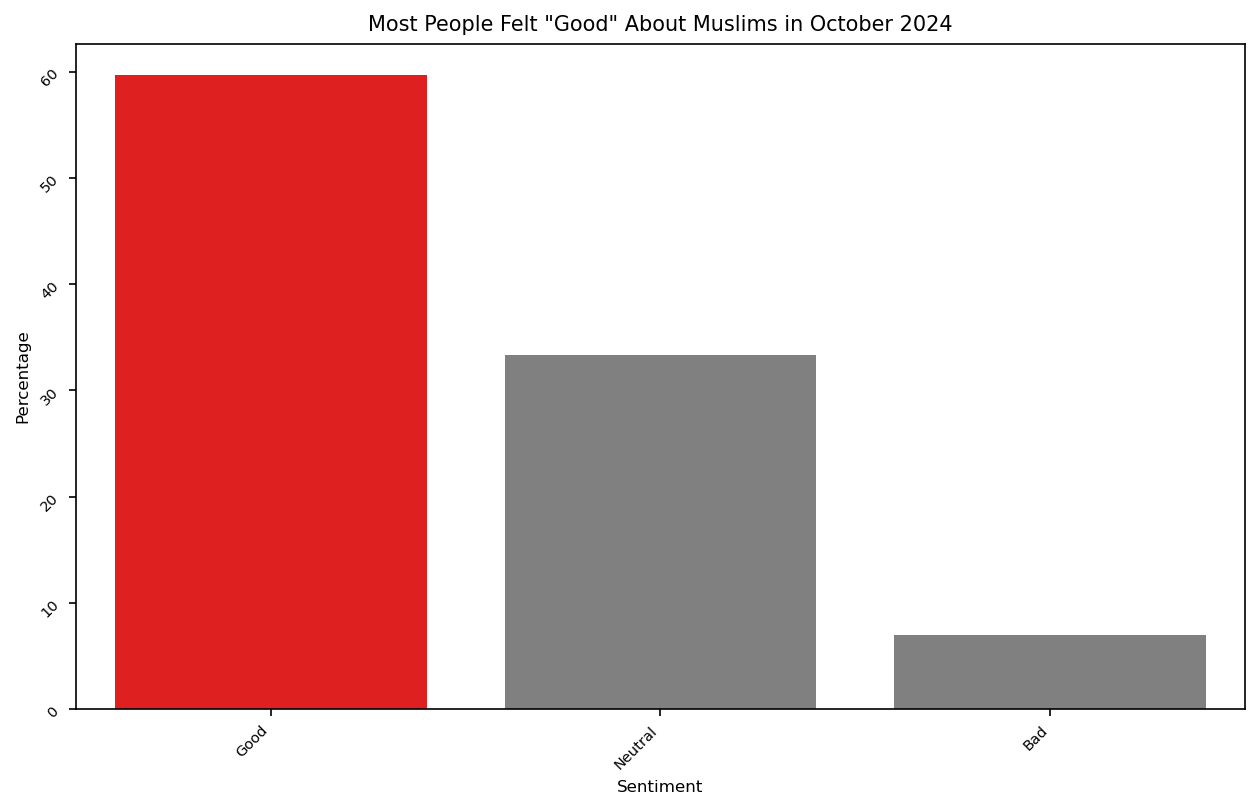

In [74]:
plot_percentages(oct24,'How do you feel about Muslim people in America?', 'Sentiment', \
                 'Most People Felt "Good" About Muslims in October 2024')

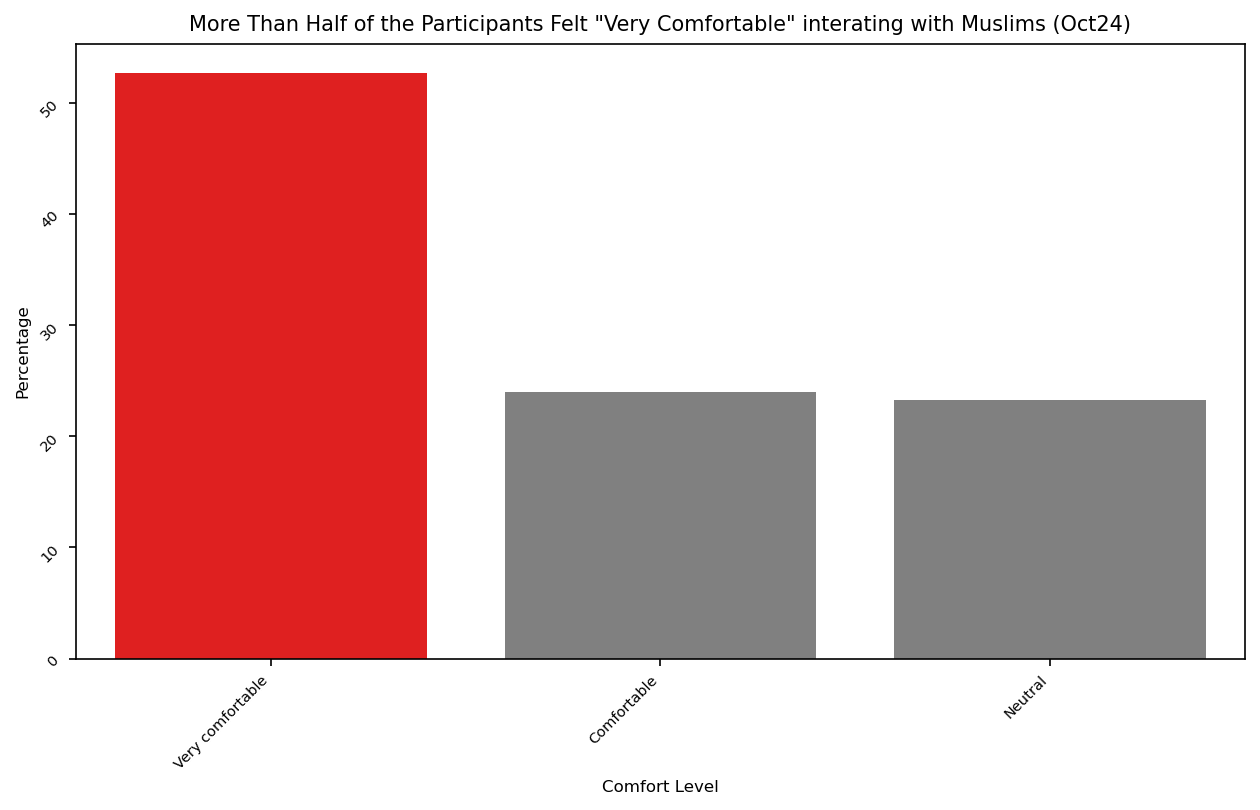

In [75]:
plot_percentages(oct24,'How comfortable do you feel interacting with Muslims in your community?', "Comfort Level",\
                 'More Than Half of the Participants Felt "Very Comfortable" interating with Muslims (Oct24)')

# 2. Distribution of Religions

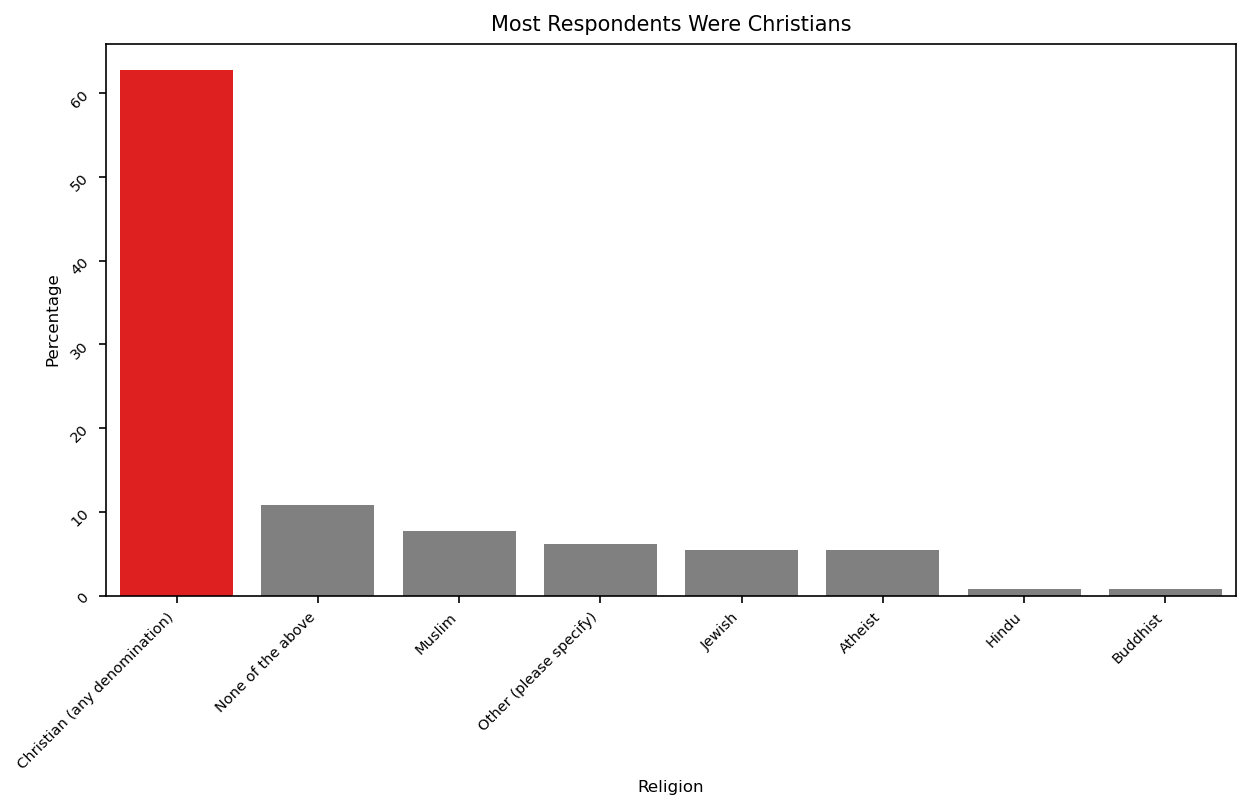

In [76]:
plot_percentages(oct24,'What is your religion?', 'Religion', 'Most Respondents Were Christians')

In [77]:
oct24['What is your religion?'].value_counts()

Christian (any denomination)    81
None of the above               14
Muslim                          10
Other (please specify)           8
Jewish                           7
Atheist                          7
Hindu                            1
Buddhist                         1
Name: What is your religion?, dtype: int64

# 3. Religious Differences in Attitudes Toward Muslims

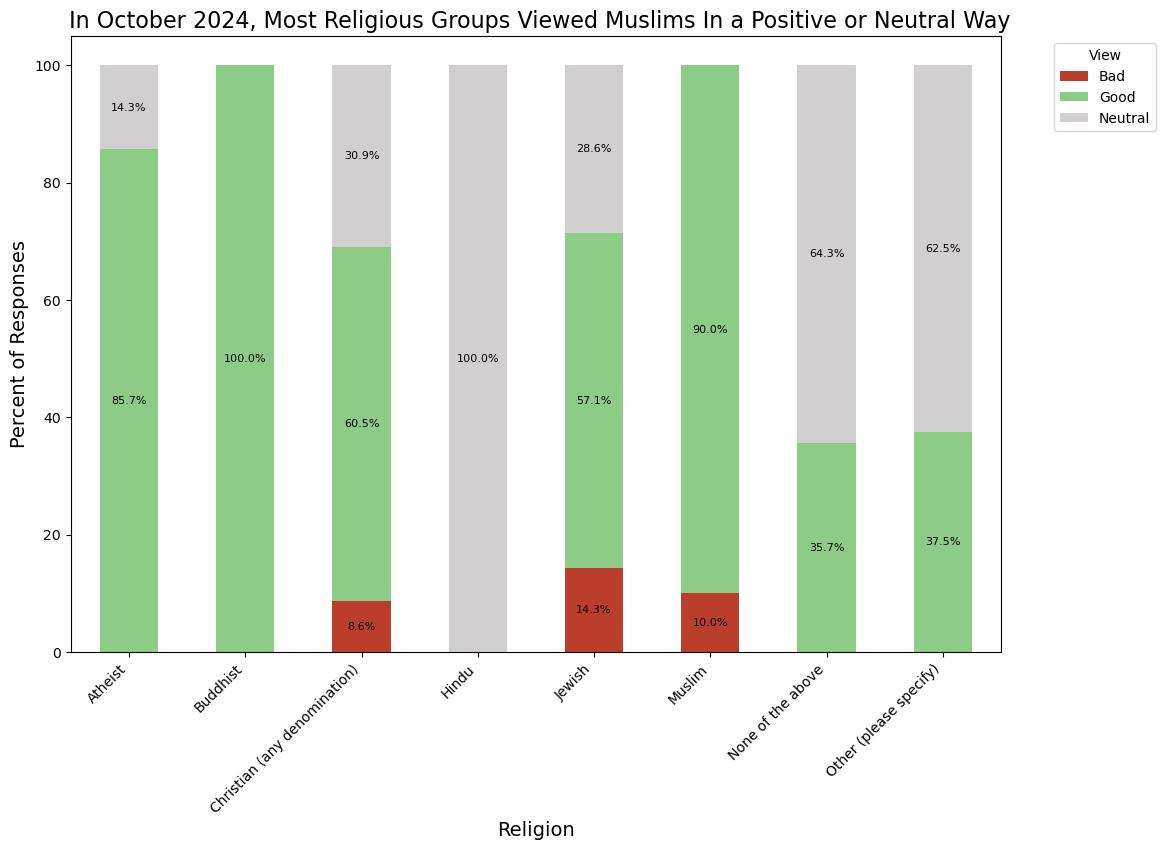

<Figure size 7200x4000 with 0 Axes>

In [78]:
plot_stacked_bar_chart(
    df=oct24,  
    title=' In October 2024, Most Religious Groups Viewed Muslims In a Positive or Neutral Way',
    xlabel='Religion',
    ylabel='Percent of Responses',
    cat_col='What is your religion?',
    sent_col='How do you feel about Muslim people in America?',
)

In [79]:
oct24[oct24['What is your religion?']=='Other (please specify)']['Religion_other'].value_counts()

catholic       3
Catholic       3
The            1
Pastafarian    1
Name: Religion_other, dtype: int64

## Observation 1: Majority Positive or Neutral Perceptions Across Religious Backgrounds

Most religious groups have a majority of responses falling under "Good" or "Neutral." This observation supports a general positive or neutral perception among various religious groups. 
However, some groups (e.g., "Jewish", 'Muslim", and "Christian") show noticeable proportions of "Bad" responses, with Jewish respondents having the highest proportion of negative views (14.3% of Jewish people feel negatively about Muslims)

It is also interesting that 100% of Hindus feel neutral about Muslims, which was not the case in the data presented in June 2024


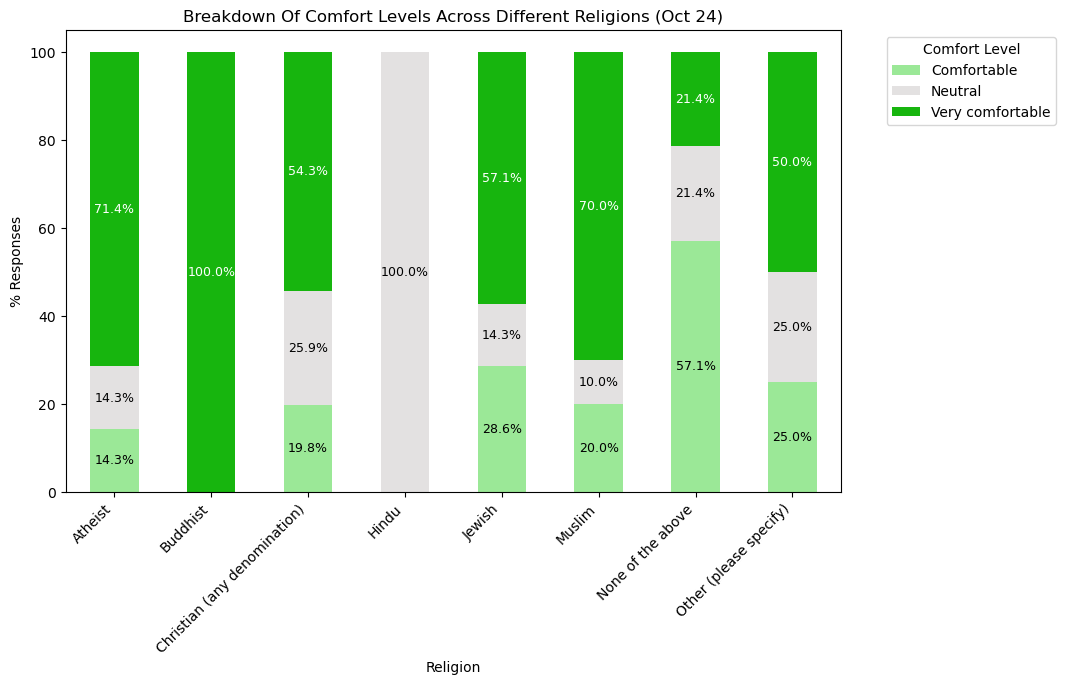

In [80]:
plot_comfort(
    df= oct24, 
    category_col= 'What is your religion?',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Different Religions (Oct 24)',
    xlabel='Religion',
    ylabel='% Responses',
)

## Observation 2

Participants generally feel comfortable around Muslims, with no reports of discomfort and only a small minority (20%) indicating a "Neutral" stance. 

This suggests a strong, positive social climate or acceptance among the respondents, as there's no indication of negative sentiment in this aspect

# 4. Educational Differences in Attitudes Towards Muslims

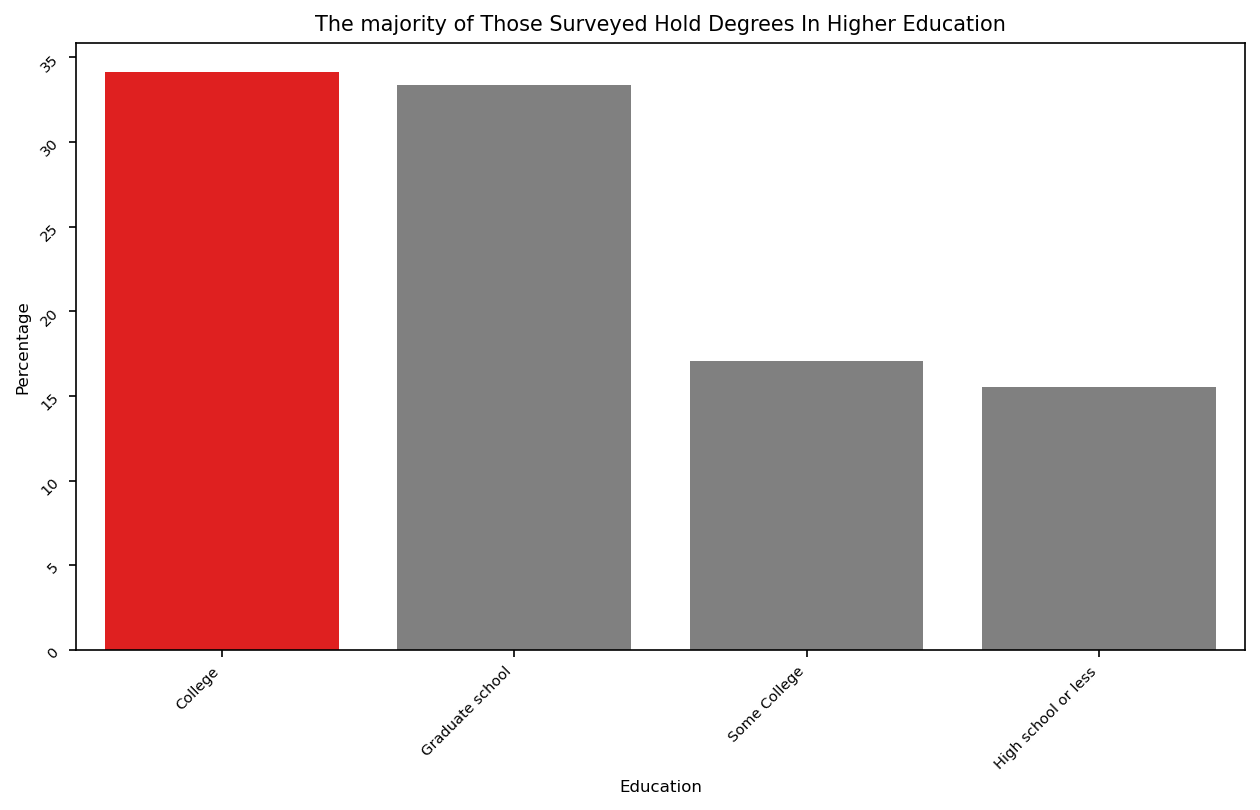

In [81]:
plot_percentages(oct24,'What is your level of education?', 'Education',
           'The majority of Those Surveyed Hold Degrees In Higher Education')

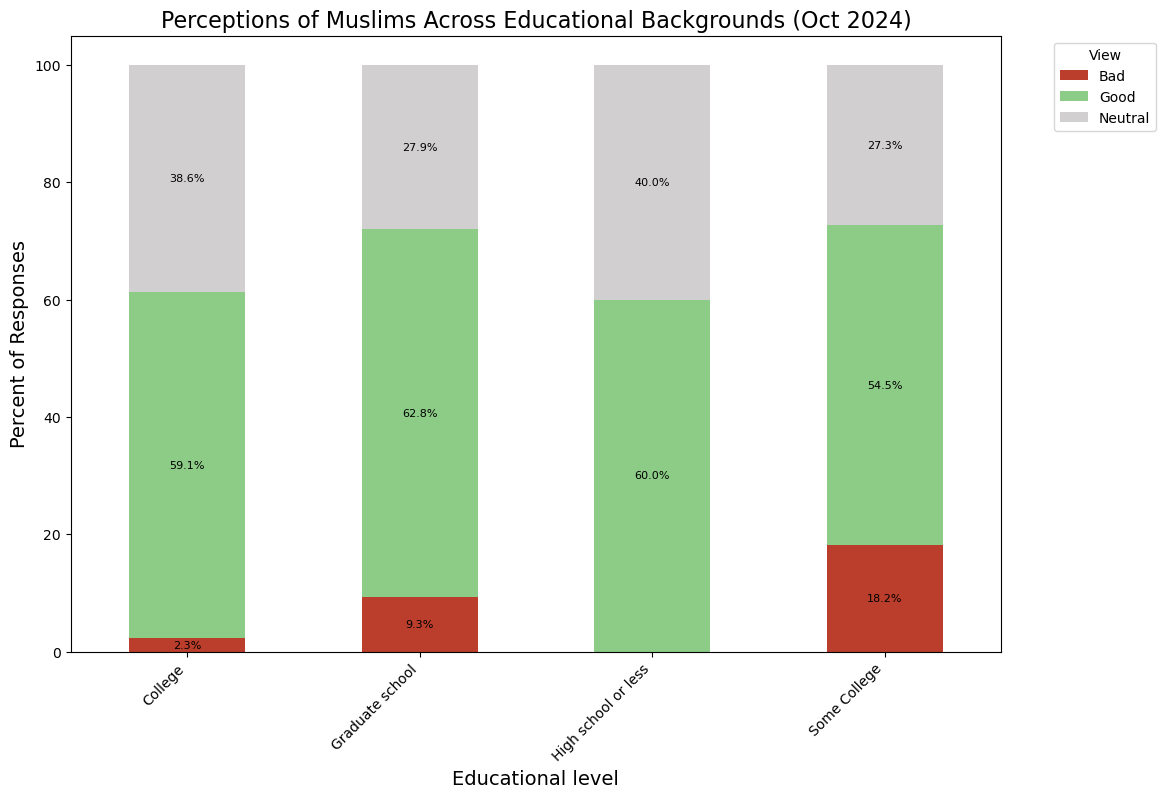

<Figure size 7200x4000 with 0 Axes>

In [82]:
plot_stacked_bar_chart(
    df=oct24, 
    title='Perceptions of Muslims Across Educational Backgrounds (Oct 2024)',
    xlabel='Educational level',
    ylabel='Percent of Responses',
    cat_col='What is your level of education?',
    sent_col='How do you feel about Muslim people in America?'
)

## Observation 3 : Majority Positive or Neutral Perceptions Across Educational Levels

The highest percentage of "Neutral" responses is found among those with only a college degree (38.6%) and those with a high school education or less (40.0%).
In contrast, individuals with graduate school education and those with some college education show slightly lower "Neutral" responses, with 27.9% and 27.3%, respectively.


The lowest percentage of "Bad" responses is among those with a college degree (2.3%).Graduate school respondents have a slightly higher rate of "Bad" responses at 9.3%. Interestingly, those with some college education display the highest percentage of "Bad" responses at 18.2%, suggesting a possible correlation between partial college education and higher negative perceptions.

Graduate school respondents have the highest percentage of "Good" responses at 62.8%, closely followed by individuals with a high school education or less at 60.0%.
This could imply that both the highly educated and those with basic education levels have more favorable views than those with intermediate education levels (some college).

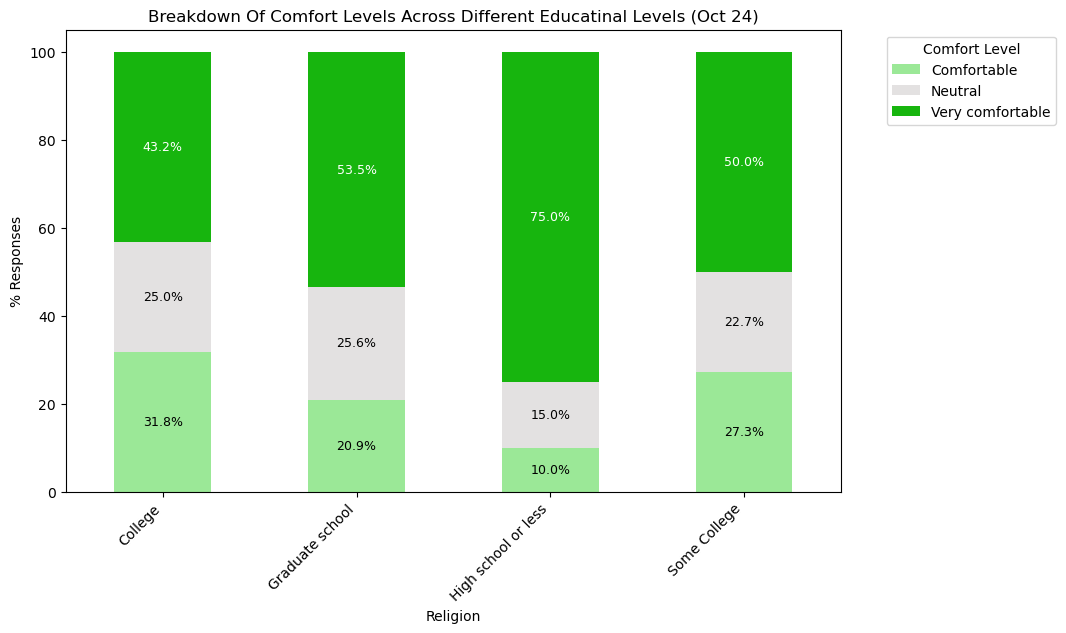

In [83]:
plot_comfort(
    df= oct24, 
    category_col= 'What is your level of education?',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Different Educatinal Levels (Oct 24)',
    xlabel='Religion',
    ylabel='% Responses',
)

## Observation 4 :

Respondents with the least education reported the highest levels of being "Very Comfortable" (75%), significantly higher than other groups.

Graduate School: Graduate-level respondents had the highest combined proportion of "Very Comfortable" (53.5%) and "Comfortable" (20.9%), suggesting overall high comfort.

Some College: This group displayed more balanced responses, with notable proportions of "Comfortable" (27.3%) and "Neutral" (22.7%).

College Degree: College graduates exhibited the most diversity in comfort levels, with a significant proportion (25%) reporting "Neutral."


# 5. Age Differences in Attitudes Towards Muslims

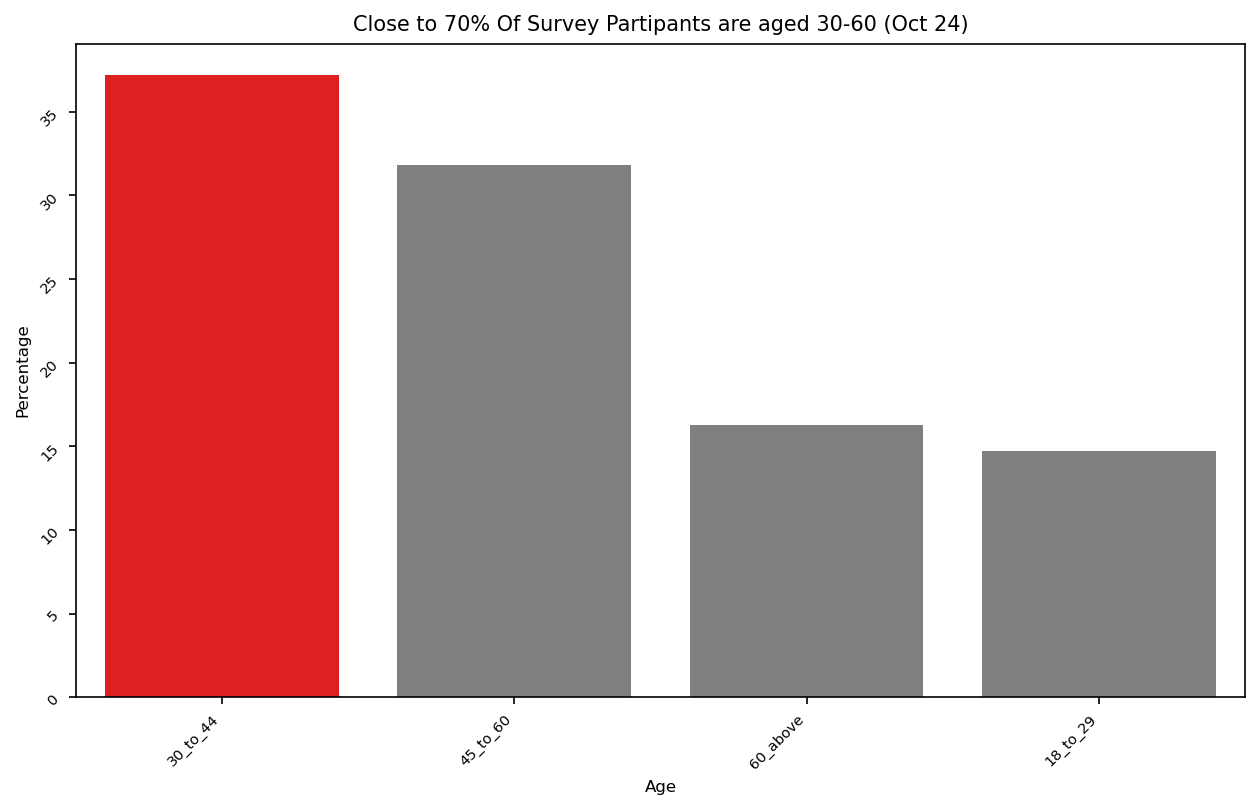

In [84]:
plot_percentages(oct24,'Age', 'Age',
           'Close to 70% Of Survey Partipants are aged 30-60 (Oct 24)')

This distribution suggests that the survey results may be more reflective of perspectives or experiences common to people aged 30 to 60, especially those in the 30 to 44 range.

The lower representation of younger (18 to 29) and older (60+) participants might mean that any insights drawn from this survey could be less generalizable to these age groups.

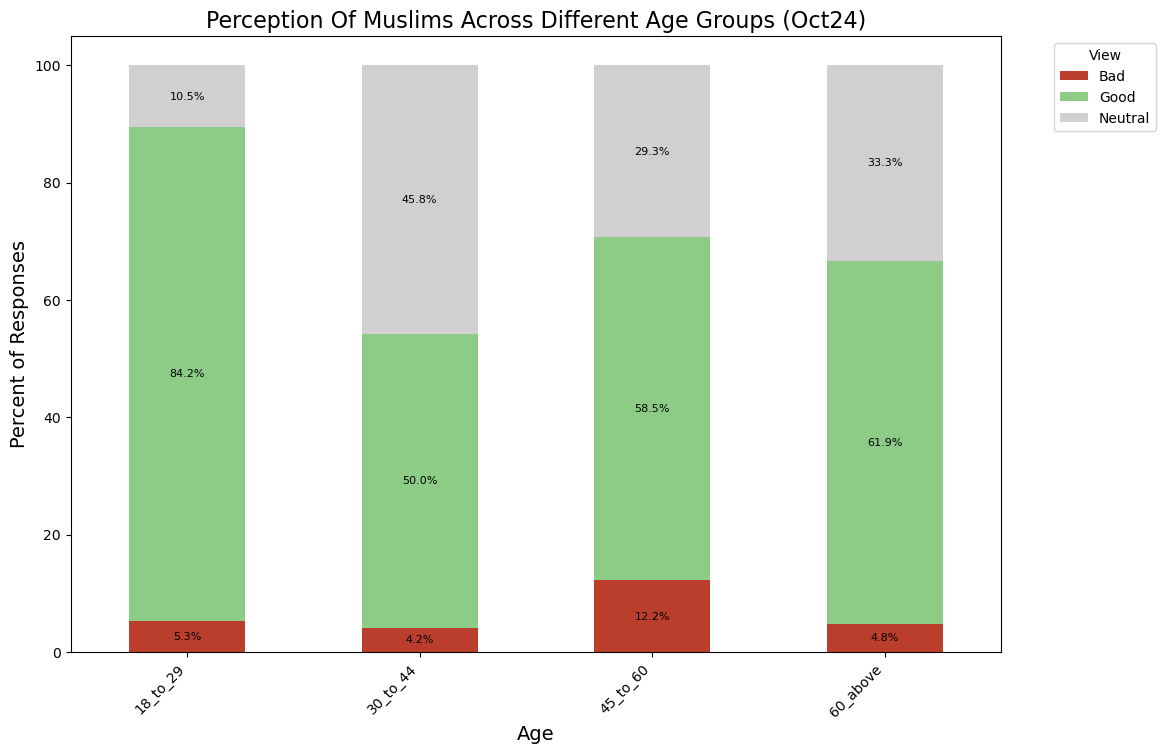

<Figure size 7200x4000 with 0 Axes>

In [85]:
plot_stacked_bar_chart(
    df=oct24, 
    title='Perception Of Muslims Across Different Age Groups (Oct24)',
    xlabel='Age',
    ylabel='Percent of Responses',
    cat_col='Age',
    sent_col='How do you feel about Muslim people in America?'
)

## Observation 5 : Strong Positive Sentiment Among Younger Respondents

The age group 18 to 29 has the highest percentage of "Good" responses at 84.2%, indicating a very positive perception of Muslims among younger adults.This group also has the lowest percentage of "Neutral" responses (10.5%) and a minimal amount of "Bad" responses (5.3%), further reinforcing the strong positive sentiment.

Ages 30 to 44: This age group shows a fairly balanced distribution with 50% "Good" and 45.8% "Neutral." Only 4.2% reported "Bad" responses, suggesting a generally positive but somewhat mixed sentiment.

Ages 45 to 60: This group displays a decrease in positive sentiment (58.5% "Good") and a notable increase in "Bad" responses at 12.2%, the highest across all age groups. The "Neutral" responses (29.3%) suggest a more divided perspective within this age range.

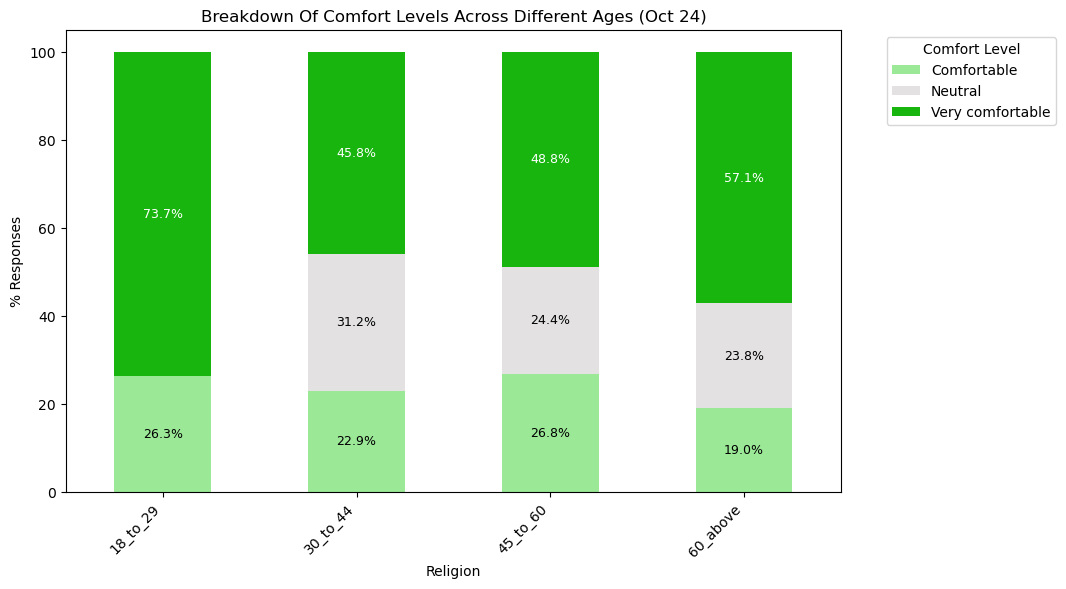

In [86]:
plot_comfort(
    df= oct24, 
    category_col= 'Age',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Different Ages (Oct 24)',
    xlabel='Religion',
    ylabel='% Responses',
)

## Observation 6 

Younger respondents (18 to 29) overwhelmingly feel "Very Comfortable" around Muslims, while comfort levels among older groups are more distributed, with a notable proportion of neutral responses in the 30 to 60+ age ranges. 

This suggests a potential generational difference in comfort levels.

# 6. Income-Based Differences in Attitudes Towards Muslims

In [87]:
oct24['Household Income'].value_counts()

50000_to_74999      25
25000_to_49999      25
100000_to_124999    14
0_to_9999           11
75000_to_99999       9
150000_to_174999     9
200000_and_up        9
10000_to_24999       8
175000_to_199999     7
125000_to_149999     7
no_answer            5
Name: Household Income, dtype: int64

In [88]:
income_mapping = {
    "50000_to_74999":  "50k-74k",
    "25000_to_49999":  "25k_49k",
    "100000_to_124999": "100k-124k",
    "0_to_9999": "0-9k",
    "75000_to_99999": "75k_100k",
    "150000_to_174999": "150k_174k",
    "200000_and_up": "200k_up",
    "10000_to_24999": "10k-24k",
    "175000_to_199999" :"175k_199k",
    "125000_to_149999": "125k-149k",
   "no_answer": "undisclosed"
}

oct24['Household Income'] = oct24['Household Income'].replace(income_mapping)

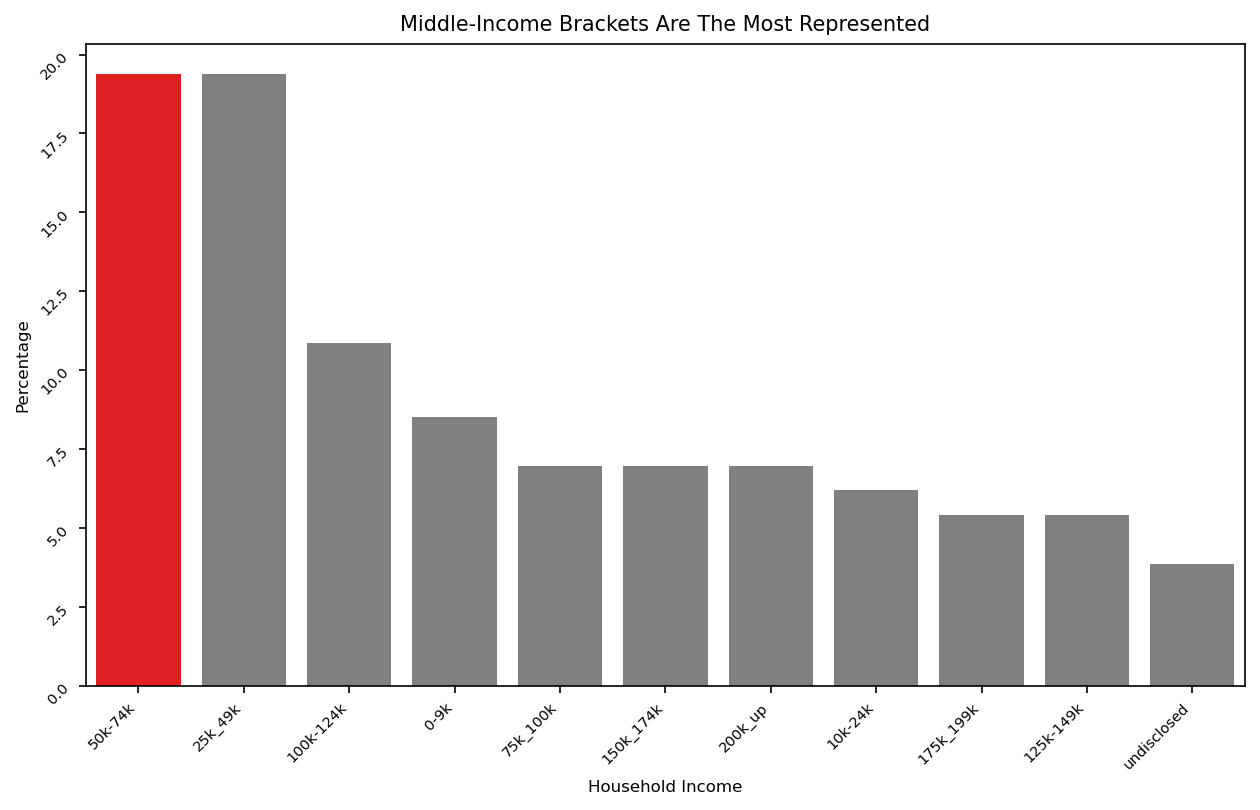

In [89]:
plot_percentages(oct24,'Household Income', 'Household Income',
           'Middle-Income Brackets Are The Most Represented')

In [90]:
def plot_perc(df, column_name, x_label, title):
    """
    Creates a bar plot of the percentage distribution of categories in a column.
    Highlights the largest percentage in red and the rest in grey.
    """
    
    counts_df = df[column_name].value_counts(normalize=True).reset_index()
    counts_df.columns = ['Category', 'Percentage']
    counts_df['Percentage'] *= 100  

   
    
    plt.figure(figsize=(9, 5), dpi=300)
    sns.barplot(x='Category', y='Percentage', data=counts_df, palette= "Blues")


    plt.title(title, fontsize=12)
    plt.xlabel(x_label, fontsize=10)
    plt.ylabel('Percentage', fontsize=10)
    plt.xticks(rotation=45, ha='right') 

    plt.show()

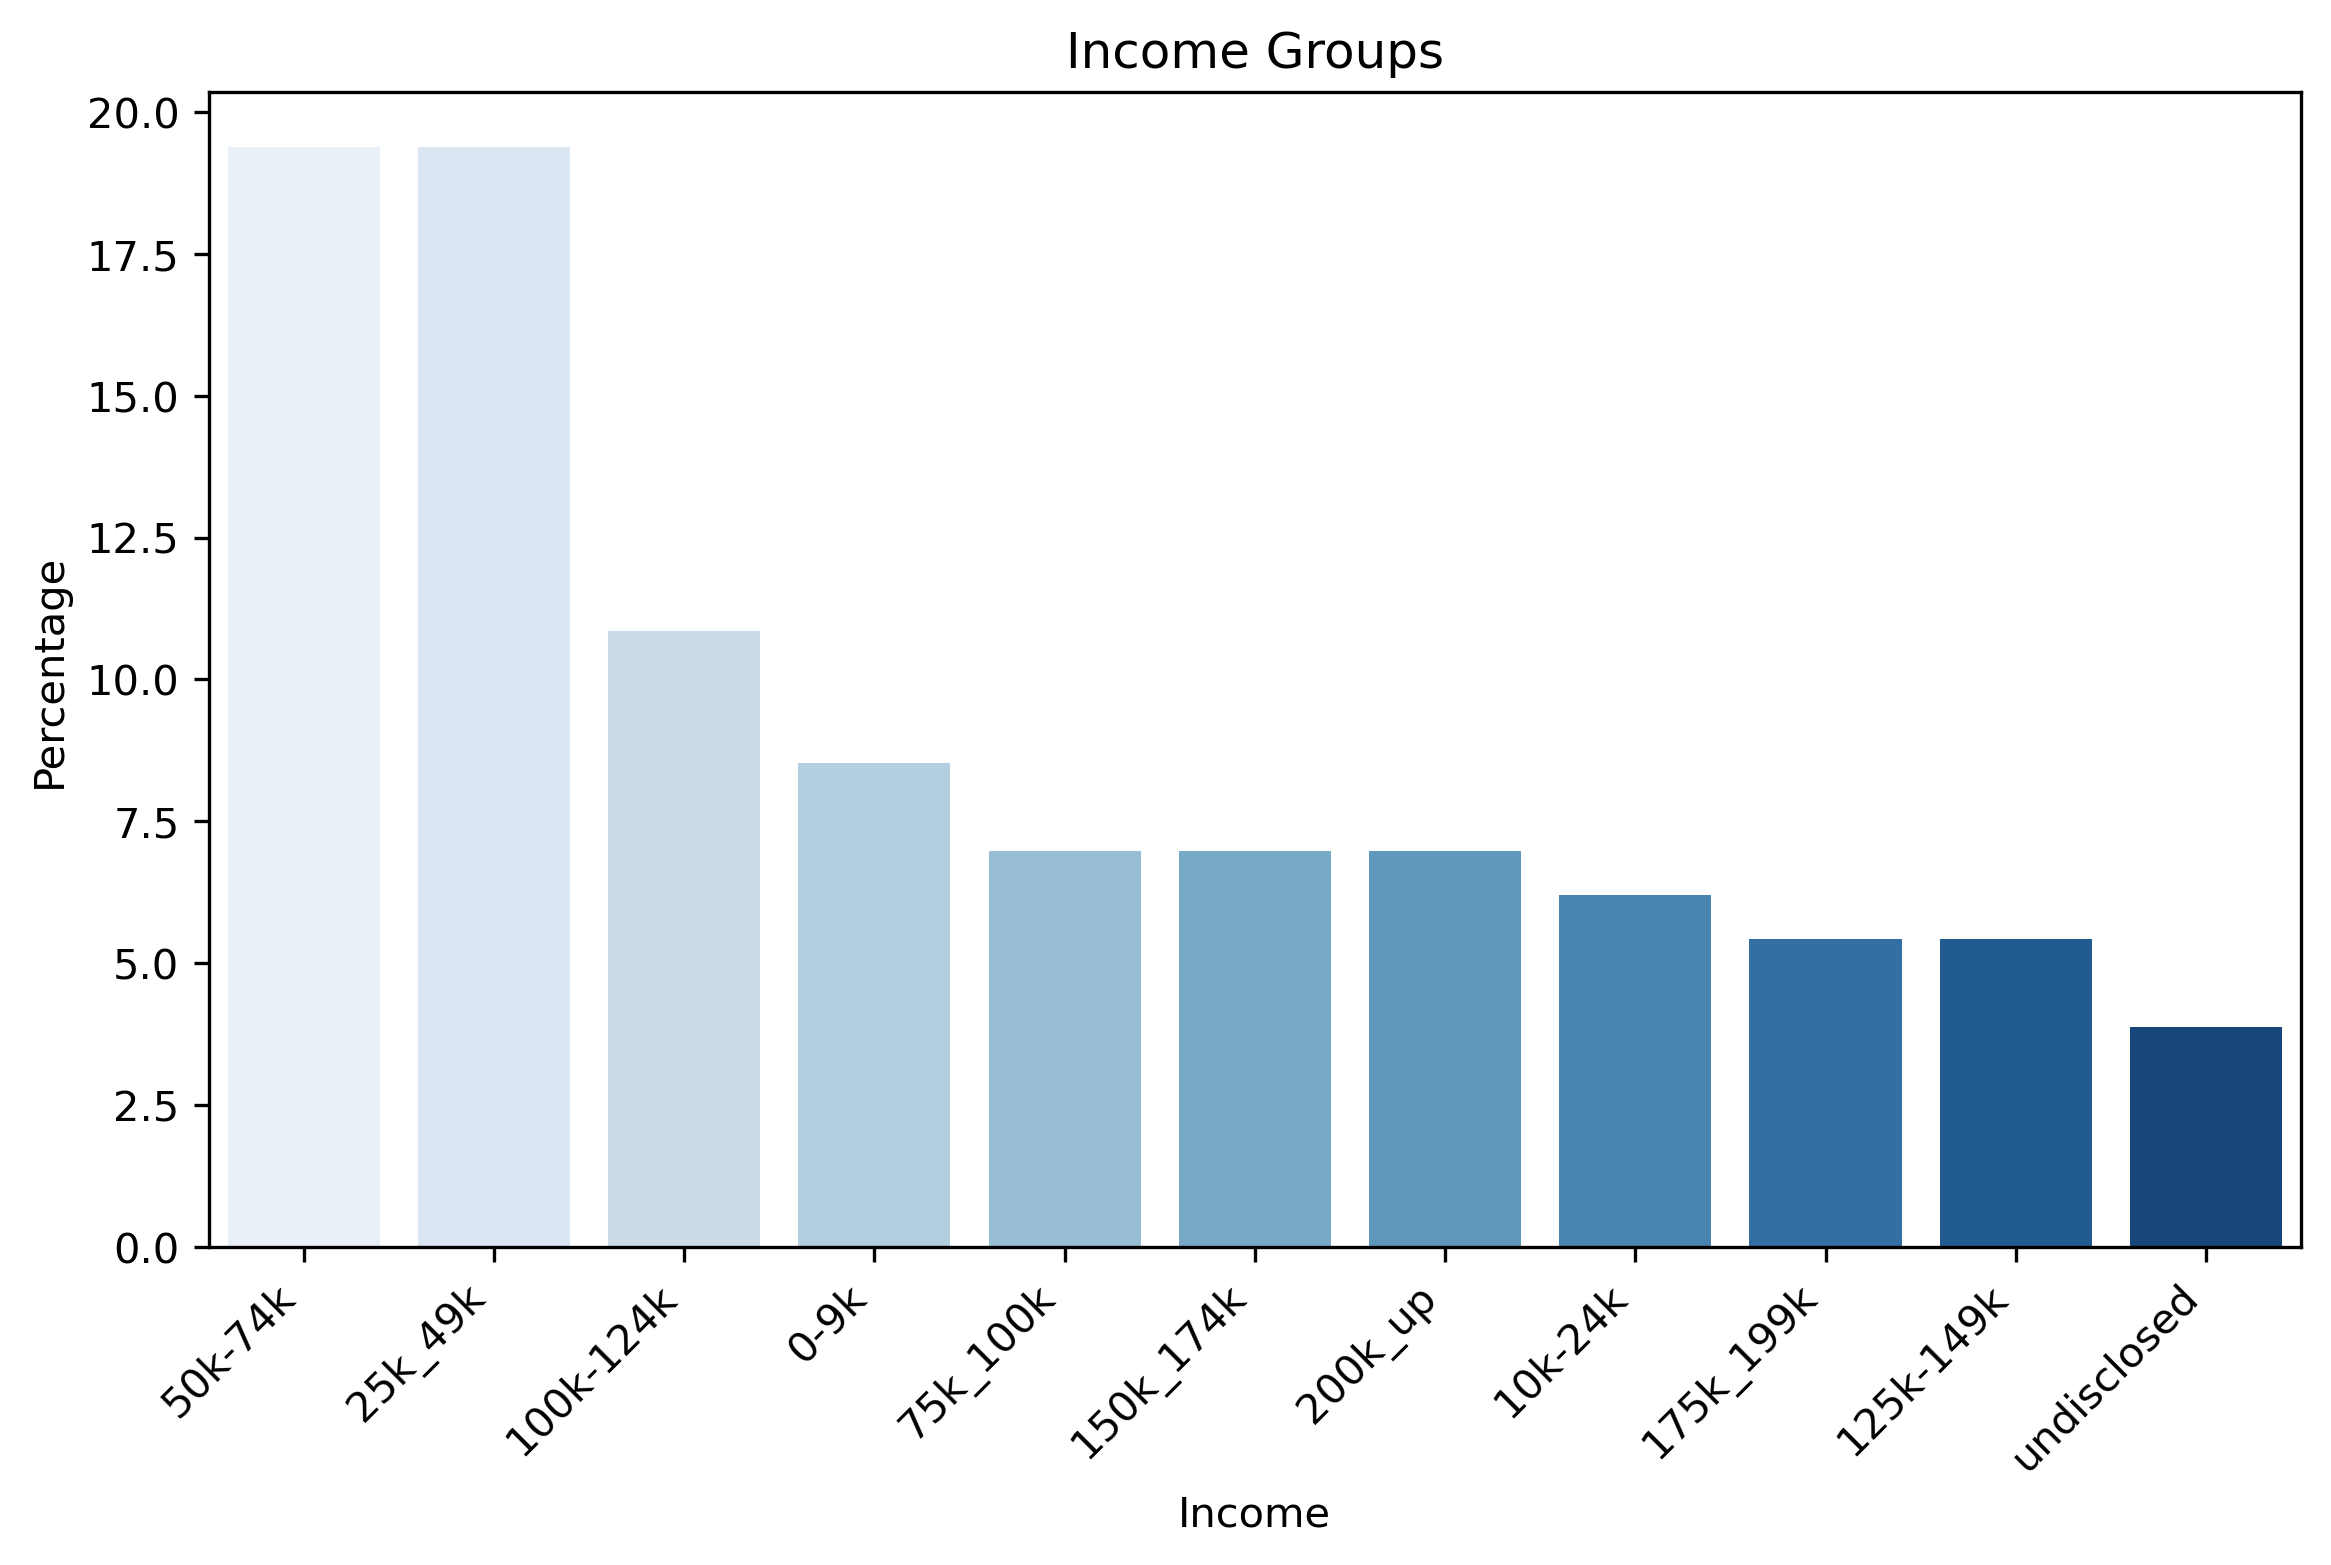

In [91]:
plot_perc(oct24, 'Household Income', 'Income', 'Income Groups')

In [93]:
oct24['Household Income'].value_counts()

50k-74k        25
25k_49k        25
100k-124k      14
0-9k           11
75k_100k        9
150k_174k       9
200k_up         9
10k-24k         8
175k_199k       7
125k-149k       7
undisclosed     5
Name: Household Income, dtype: int64

## Distribution Of Income In the United States (2024)

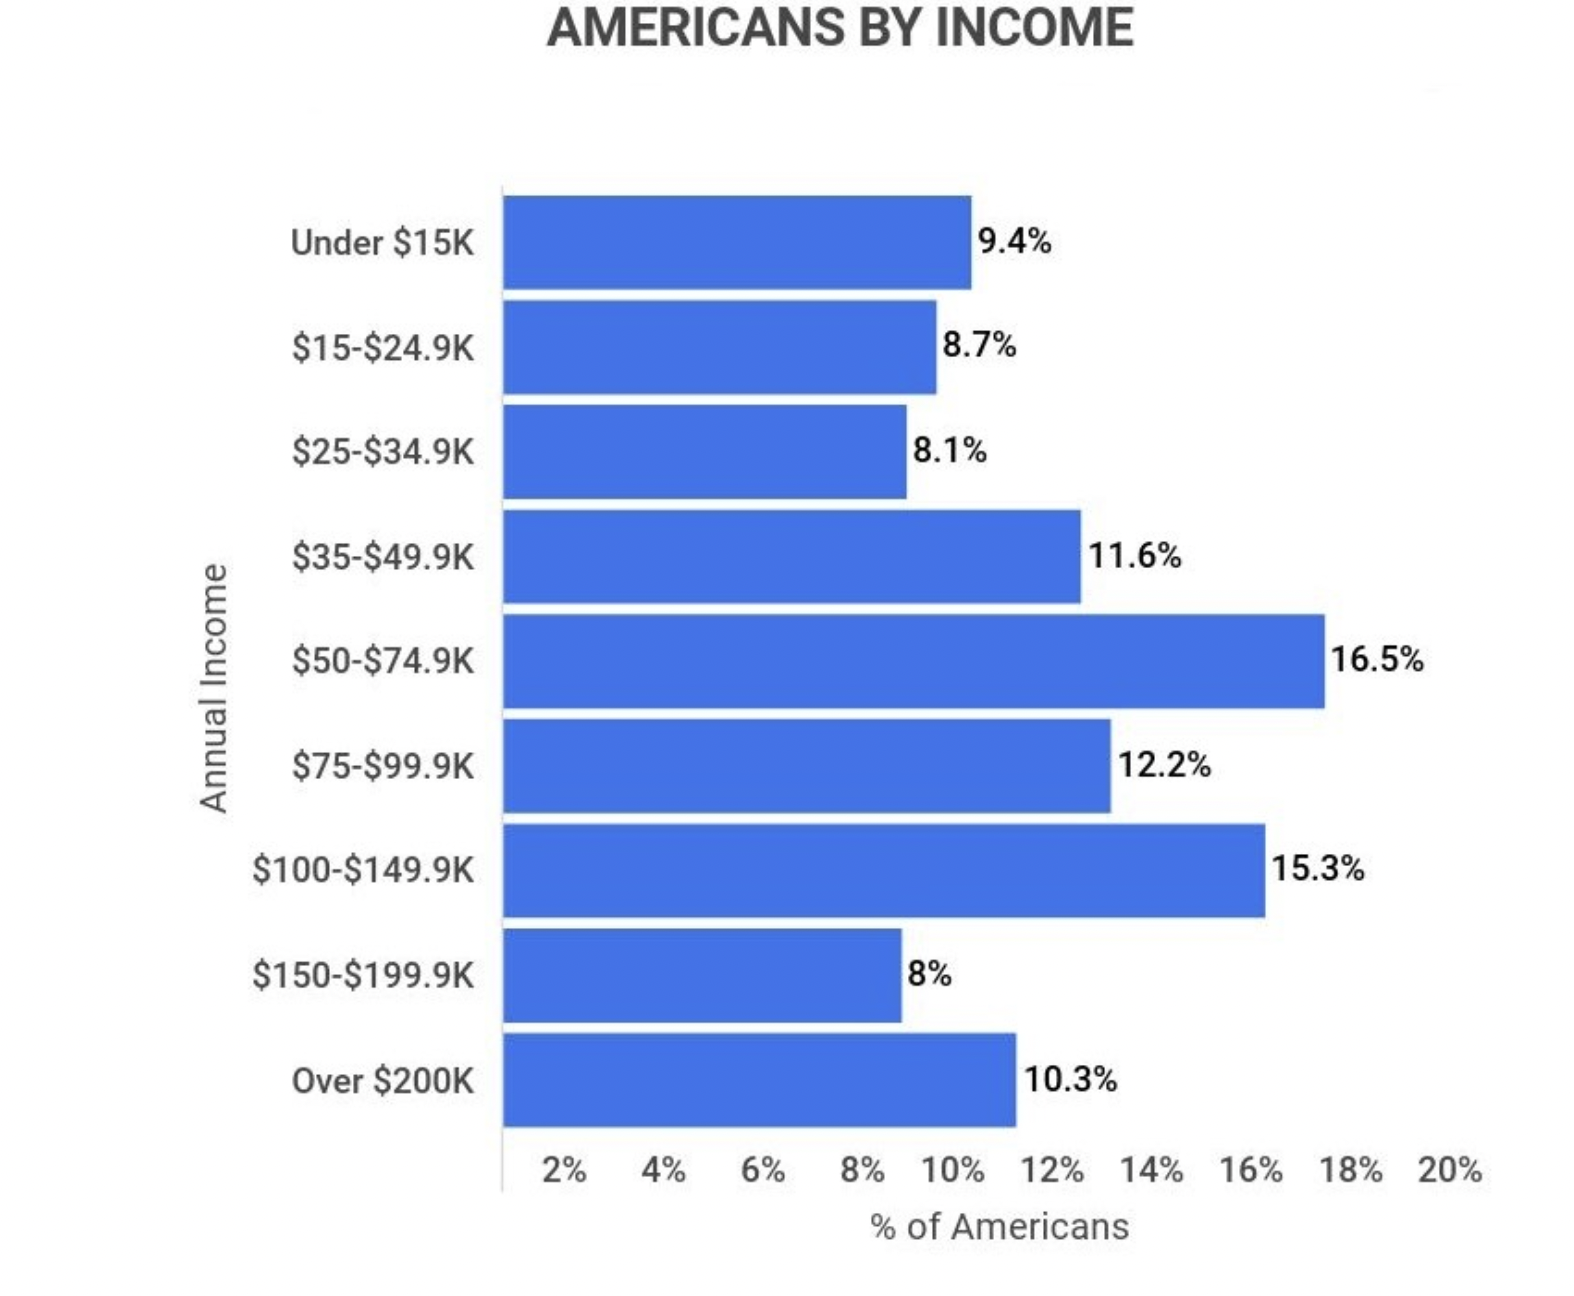

In [92]:
from IPython.display import display, Image

Image("images/income.png", width = 500)


##### The survey primarily reflects the views of respondents in middle-income brackets (25k to 75k).
Lower representation from both the lowest and highest income groups could mean that the survey findings may be more reflective of middle-income experiences or perspectives, with less input from the extremes of the income spectrum.

In [39]:
def plot_income(df, title, xlabel, ylabel, cat_col, sent_col, legend_title='View', cat_order=None):


    colors = {
        'Good': '#8ccc87',
        'Bad': '#ba3e2b',
        'Neutral': '#d1cfcf'
    }

    if cat_order:
        df[cat_col] = pd.Categorical(df[cat_col], categories=cat_order, ordered=True)

    grouped = df.groupby([cat_col, sent_col]).size().unstack(fill_value=0)

    grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

    ax = grouped_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), 
                                 color=[colors[col] for col in grouped_percentage.columns])
    

    for i, (colname, coldata) in enumerate(grouped_percentage.items()):
        for index, value in enumerate(coldata):
            if value > 0: 
                ax.text(index, 
                        grouped_percentage.iloc[:index+1, :i+1].sum(axis=1)[index] - (value / 2), 
                        f"{value:.1f}%", 
                        ha='center', 
                        va='center', 
                        color='white' if colors[colname] == 'grey' else 'black', 
                        fontsize=8)

    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(rotation=45, ha='right')

    plt.legend(title=legend_title, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

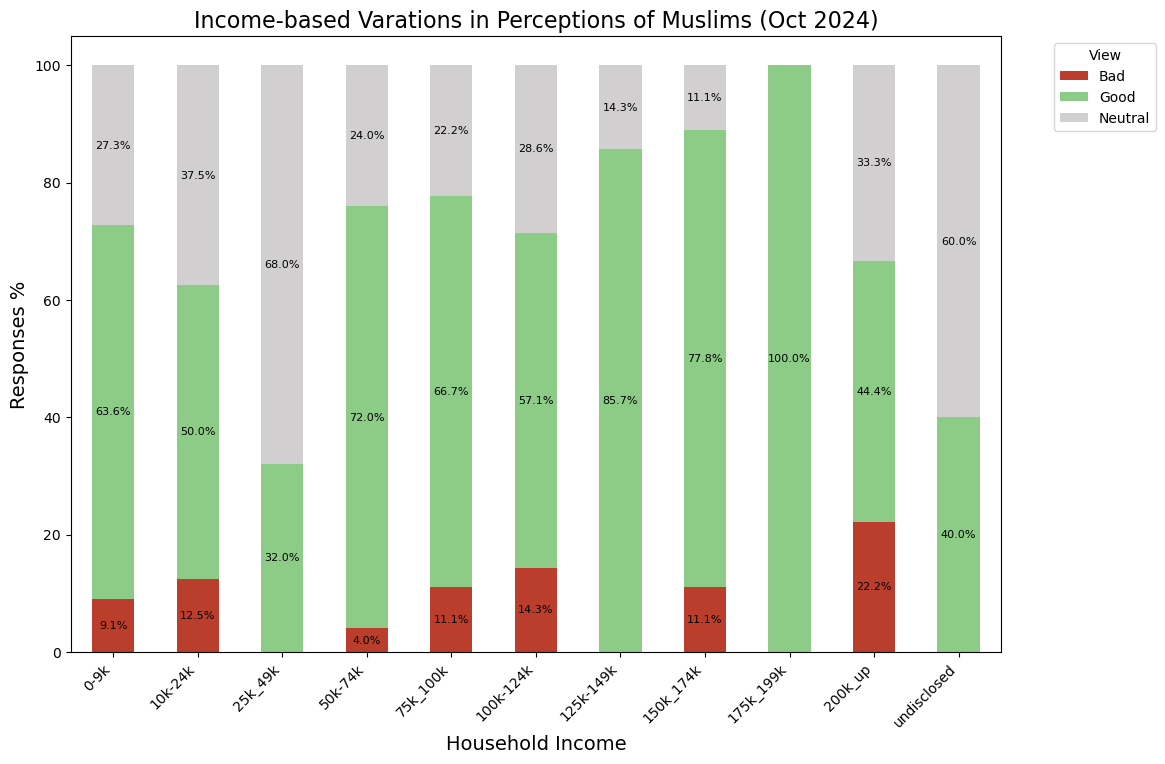

In [94]:
order = ['0-9k', '10k-24k', '25k_49k', '50k-74k', '75k_100k', 
         '100k-124k', '125k-149k', '150k_174k', '175k_199k', '200k_up', 'undisclosed']

plot_income(
    df=oct24, 
    title='Income-based Varations in Perceptions of Muslims (Oct 2024)',
    xlabel='Household Income',
    ylabel='Responses %',
    cat_col='Household Income',
    sent_col='How do you feel about Muslim people in America?',
    cat_order=order
)

## Observation 4: 

The 200k and up income bracket has the highest proportion of "Bad" responses at 22.2 percent, which is notably higher than other income groups. 175k-200k has the highest proprotion of positive responses at 100 % 

Other groups with visible levels of "Bad" responses include 100k to 125k (14.3 %) and 75k- 100k (11.1%).
The 25k to 50k bracket has the highest proprotion of neutral views

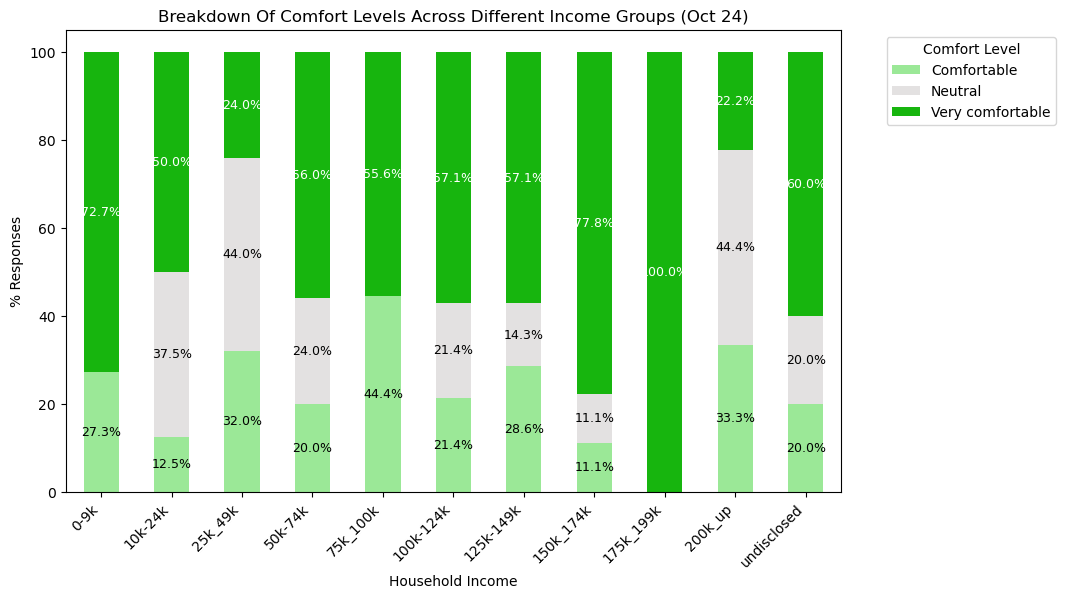

In [96]:
plot_comfort(
    df= oct24, 
    category_col= 'Household Income',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Different Income Groups (Oct 24)',
    xlabel='Household Income',
    ylabel='% Responses',
)

# 7. How Do Different Regions View Muslims

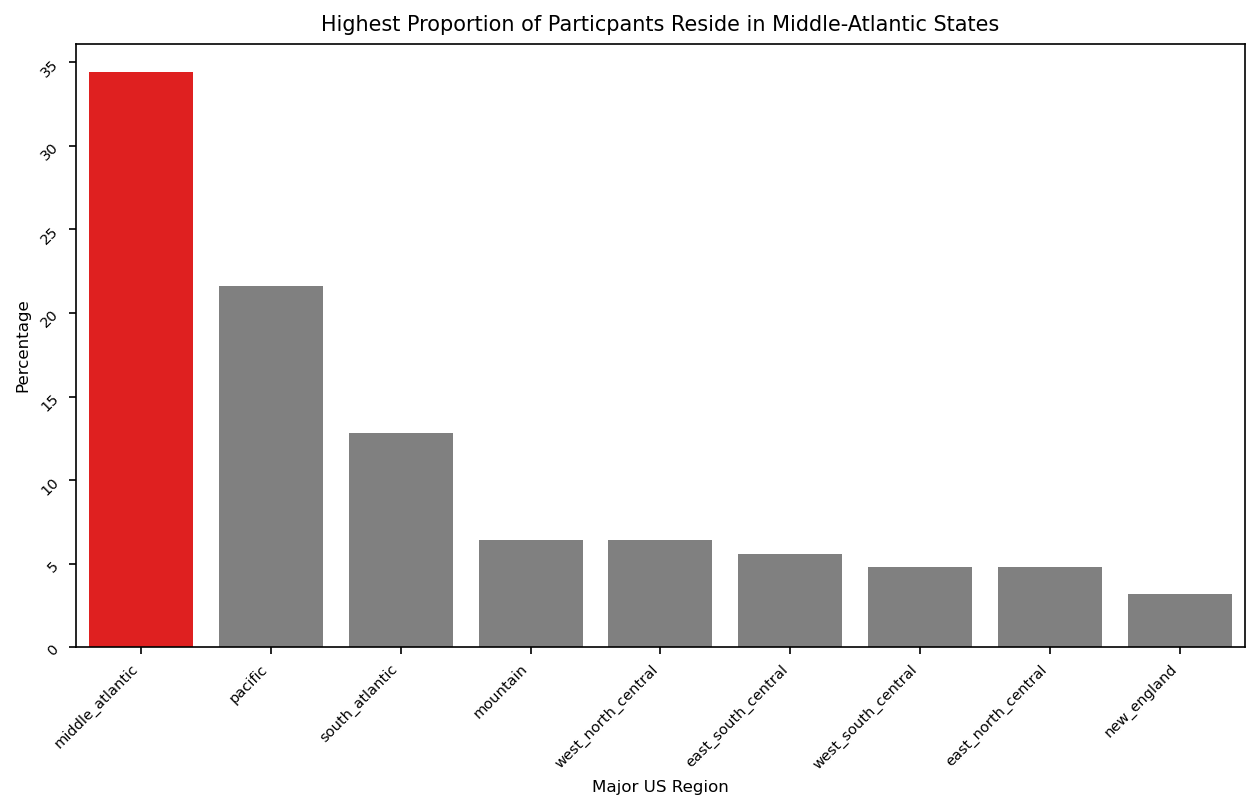

In [97]:
plot_percentages(oct24,'Major US Region', 'Major US Region',
                 'Highest Proportion of Particpants Reside in Middle-Atlantic States')

**Middle-Atlantic**: Its exact definition differs by source, but the region typically includes New Jersey, Maryland, Virginia, Delaware, West Virginia, District of Columbia, and Pennsylvania (sometimes New York)

**South-Atlantic**:  Delaware, Florida, Georgia, Maryland, North Carolina, South Carolina, Virginia, West Virginia and Washington

**Pacific**: Alaska, California, Hawaii, Oregon, and Washington

**West-South-Central**:Arkansas, Louisiana, Oklahoma, and Texas

**West-North-Central**: Iowa, Missouri, Nebraska, North Dakota, South Dakota, Minnesota and Kansas

**Mountain**: Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, and Wyoming

**East-North-Central**: Illinois, Indiana, Michigan, Ohio, Wisconsin 

**East-South-Central**: Alabama, Kentucky, Mississippi, and Tennessee


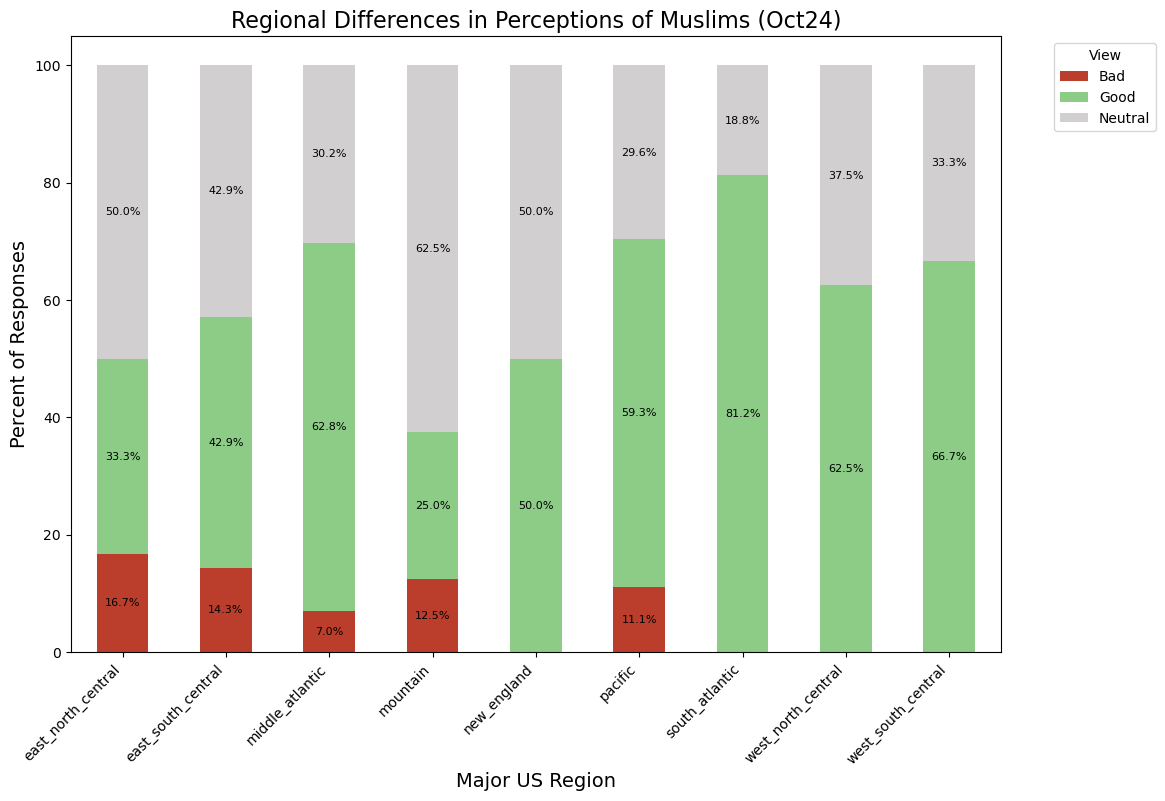

<Figure size 7200x4000 with 0 Axes>

In [98]:
plot_stacked_bar_chart(
    df=oct24, 
    title='Regional Differences in Perceptions of Muslims (Oct24)',
    xlabel='Major US Region',
    ylabel='Percent of Responses',
    cat_col='Major US Region',
    sent_col='How do you feel about Muslim people in America?'
)

## Observation 5:

The East North Central region reports the highest proportion of "Bad" responses at 16.7%, followed by the East South Central region at 14.3%. 

The New England region has a more evenly distributed sentiment, with 50% "Good" and 50% "Neutral" responses, showing a balance between positive and neutral views.

The South Atlantic region stands out, with 81.2% of respondents expressing a "Good" perception, the highest among all regions.
The Pacific region also has a significant proportion of "Good" responses at 59.3%, demonstrating positive sentiment.

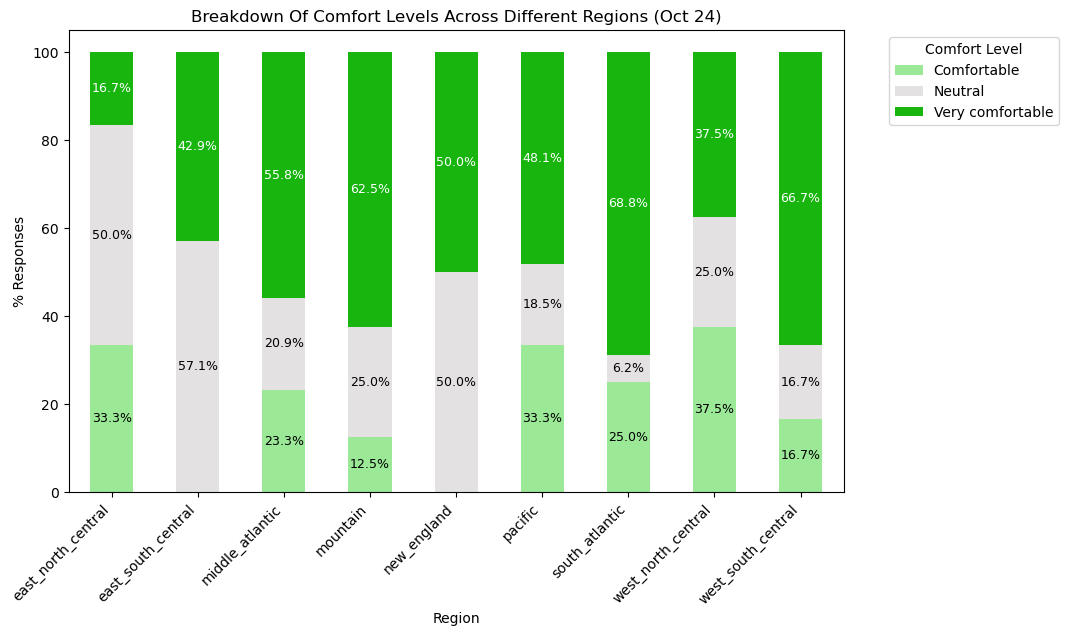

In [102]:
plot_comfort(
    df= oct24, 
    category_col= 'Major US Region',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Different Regions (Oct 24)',
    xlabel='Region',
    ylabel='% Responses',
)

# 5. Relationship Between Knowing a Muslim and Sentiment

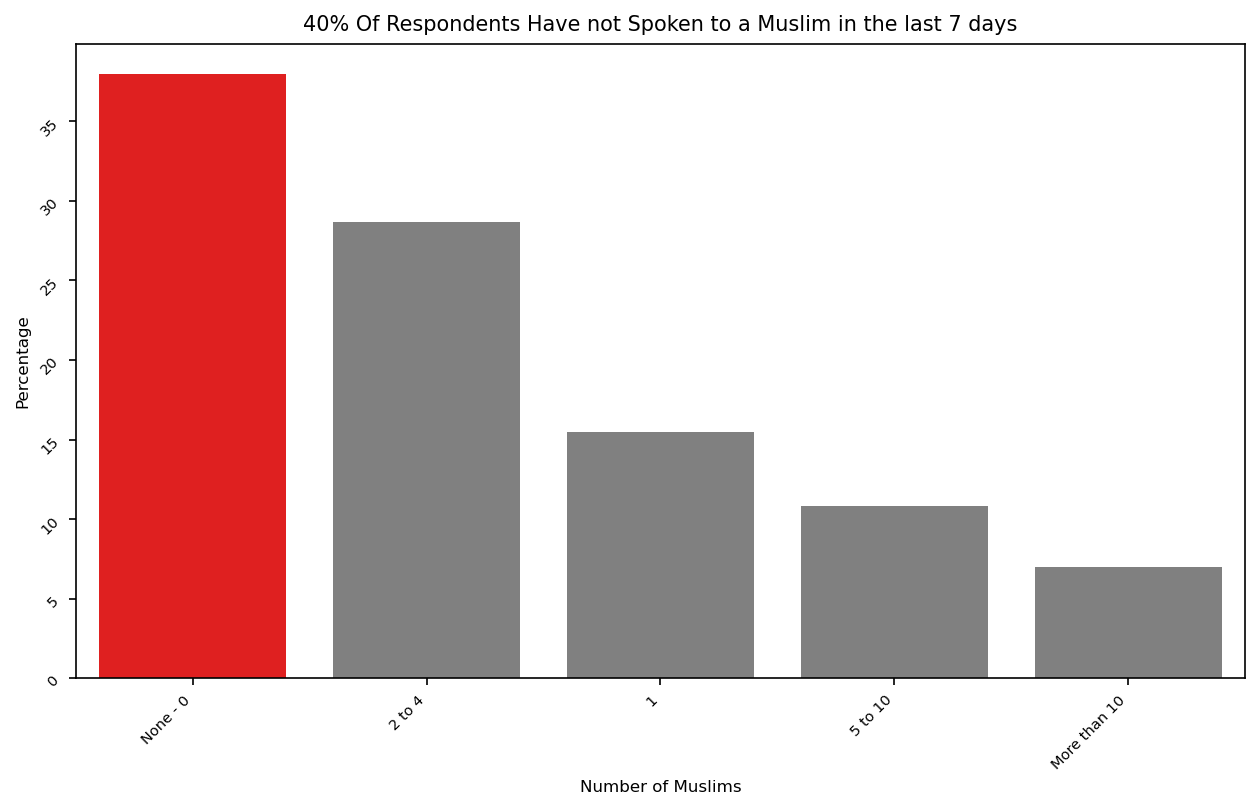

In [103]:
plot_percentages(oct24,'In the last 7 days, how many muslim people have you talked to?', 'Number of Muslims',\
           '40% Of Respondents Have not Spoken to a Muslim in the last 7 days')

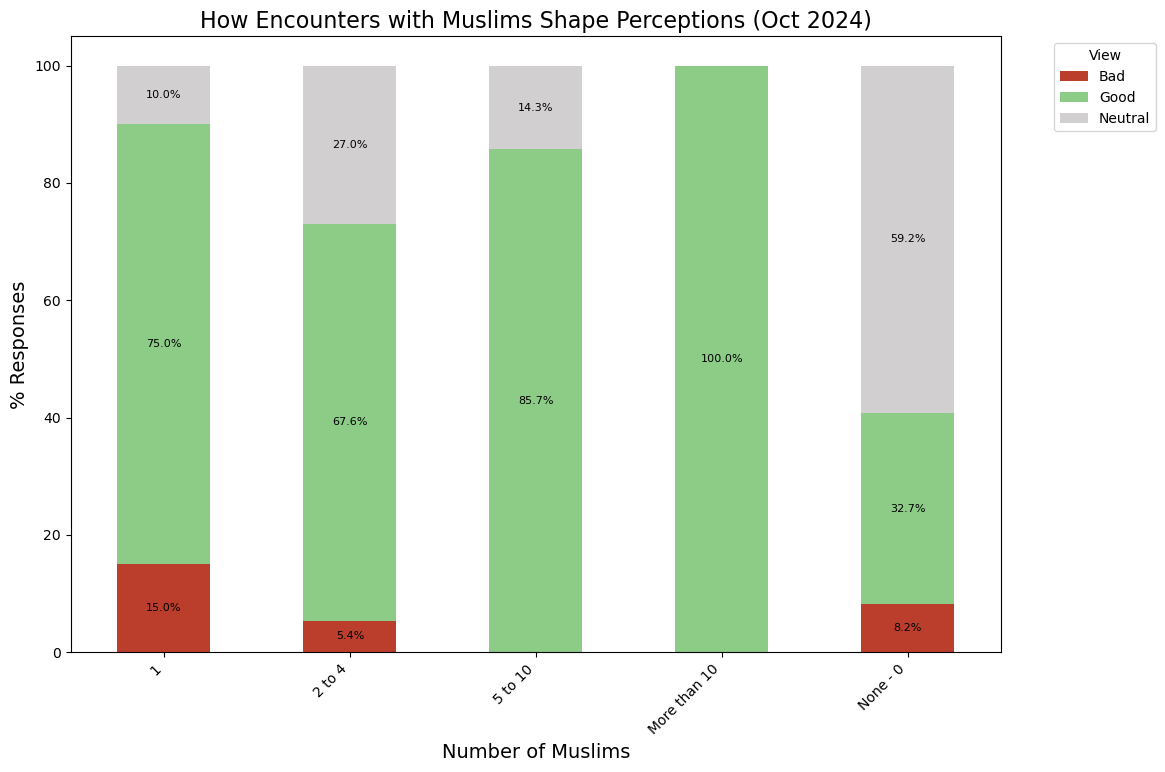

<Figure size 7200x4000 with 0 Axes>

In [104]:
plot_stacked_bar_chart(
    df=oct24, 
    title='How Encounters with Muslims Shape Perceptions (Oct 2024)',
    xlabel='Number of Muslims',
    ylabel='% Responses',
    cat_col='In the last 7 days, how many muslim people have you talked to?',
    sent_col='How do you feel about Muslim people in America?'
)

## Observation 6

Strong Positive Correlation with Increased Encounters:

Respondents who interacted with more than 10 Muslims reported 100% positive ("Good") sentiment, suggesting a strong correlation between frequent interactions and positive perceptions.
Similarly, those with 5 to 10 interactions show a high "Good" sentiment (85.7%), which supports the idea that increased contact fosters favorable views.

Among respondents who interacted with only 1 Muslim, 75% reported a positive sentiment, but 15% also expressed a "Bad" view, which is the highest proportion of negative sentiment among all groups.

For those with 2 to 4 interactions, 67.6% felt "Good," but 5.4% held a "Bad" perception, indicating a slightly more mixed view than those with more frequent interactions.


Respondents who reported no interactions with Muslims had a higher proportion of "Neutral" responses (59.2%), with a smaller percentage expressing positive (32.7%) or negative (8.2%) sentiments.

This pattern suggests that the absence of interaction may lead to more neutral perceptions, potentially due to lack of personal experience

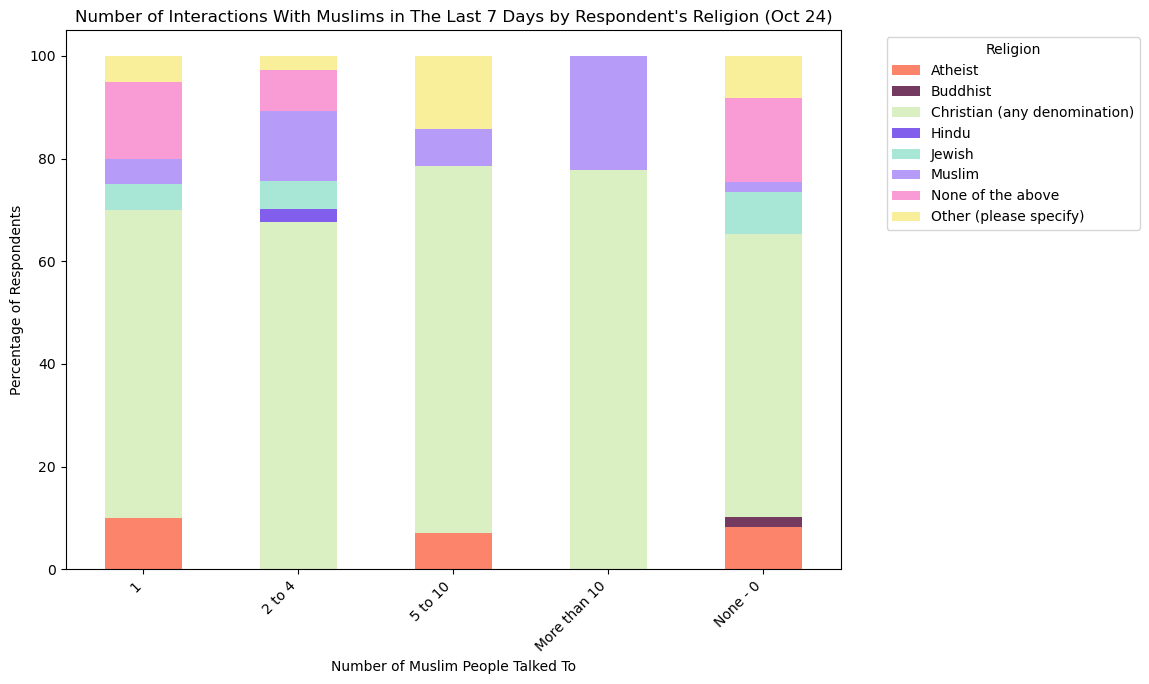

In [105]:
counts = oct24.groupby(['In the last 7 days, how many muslim people have you talked to?', 
                        'What is your religion?']).size().unstack()


percentages = counts.div(counts.sum(axis=1), axis=0) * 100


percentages.plot(kind='bar', stacked=True, figsize=(10, 7), 
                 color=['#fb846b','#743a60','#daf0c2','#825eed','#a8e6d5','#b69bf9','#f99bd5','#f9ef9b'])

plt.title("Number of Interactions With Muslims in The Last 7 Days by Respondent's Religion (Oct 24)")
plt.xlabel("Number of Muslim People Talked To")
plt.ylabel("Percentage of Respondents")
plt.xticks(rotation=45, ha='right') 

plt.legend(title="Religion", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [106]:
oct24['interaction_group'] = oct24['In the last 7 days, how many muslim people have you talked to?'].\
apply(lambda x: 'Had interactions' if x != 'None - 0' else 'No interactions')

In [107]:
grouped = oct24.groupby(['interaction_group', 'How do you feel about Muslim people in America?']).\
size().reset_index(name='count')

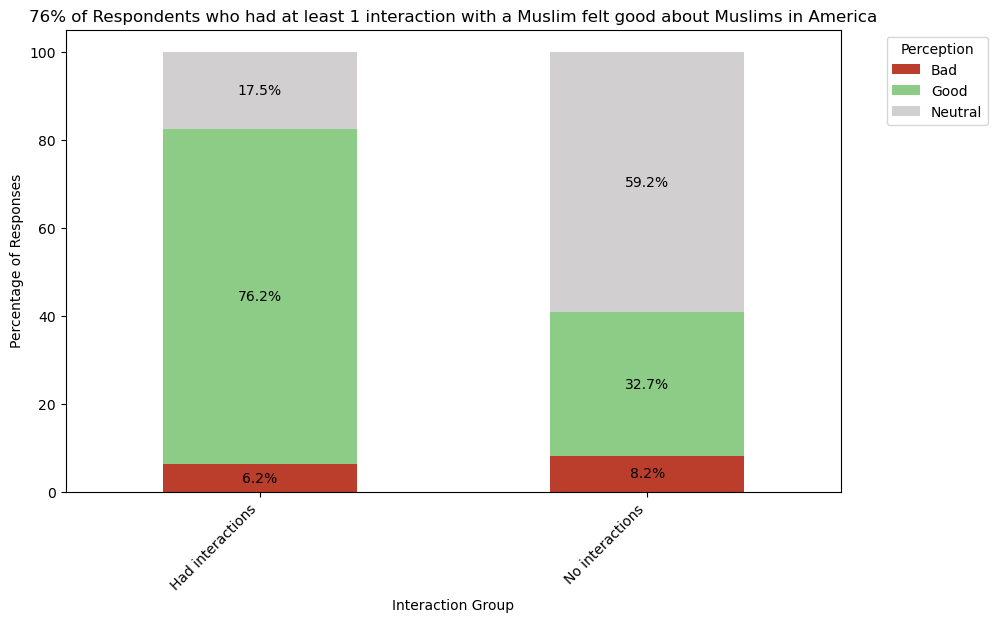

<Figure size 2700x1500 with 0 Axes>

In [108]:
totals = grouped.groupby('interaction_group')['count'].transform('sum')
grouped['percentage'] = (grouped['count'] / totals) * 100

pivot_table = grouped.pivot(index='interaction_group', 
                            columns='How do you feel about Muslim people in America?', 
                            values='percentage').fillna(0)


colors = ['#ba3e2b', '#8ccc87','#d1cfcf']  


ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)


plt.title('76% of Respondents who had at least 1 interaction with a Muslim felt good about Muslims in America')
plt.xlabel('Interaction Group')
plt.ylabel('Percentage of Responses')


for i, interaction_group in enumerate(pivot_table.index):
    cumulative_percentage = 0  
    for j, sentiment in enumerate(pivot_table.columns):
        percentage = pivot_table.loc[interaction_group, sentiment]
        if percentage > 0:
            ax.text(
                i, cumulative_percentage + (percentage / 2),  
                f"{percentage:.1f}%", 
                ha='center', va='center', color='black', fontsize=10
            )
            cumulative_percentage += percentage  
plt.xticks(rotation=45, ha='right')

plt.legend(title='Perception', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.figure(figsize=(9, 5), dpi=300)
plt.show()



## Observation 7

There is a higher positive perception with interaction. Among respondents who had interactions with Muslims, 76.2% felt good about Muslims in America, compared to only 32.7% among those with no interactions. This suggests a strong association between personal interaction and positive perception.


In the "No interactions" group, 59.2% felt neutral about Muslims, significantly higher than the 17.5% neutral perception among those who had interactions.
Similarly, the "No interactions" group had a slightly higher percentage of negative perception (8.2%) compared to those who had interactions (6.2%).

# 6. Relationship Between Primary News Sources and Public Sentiment

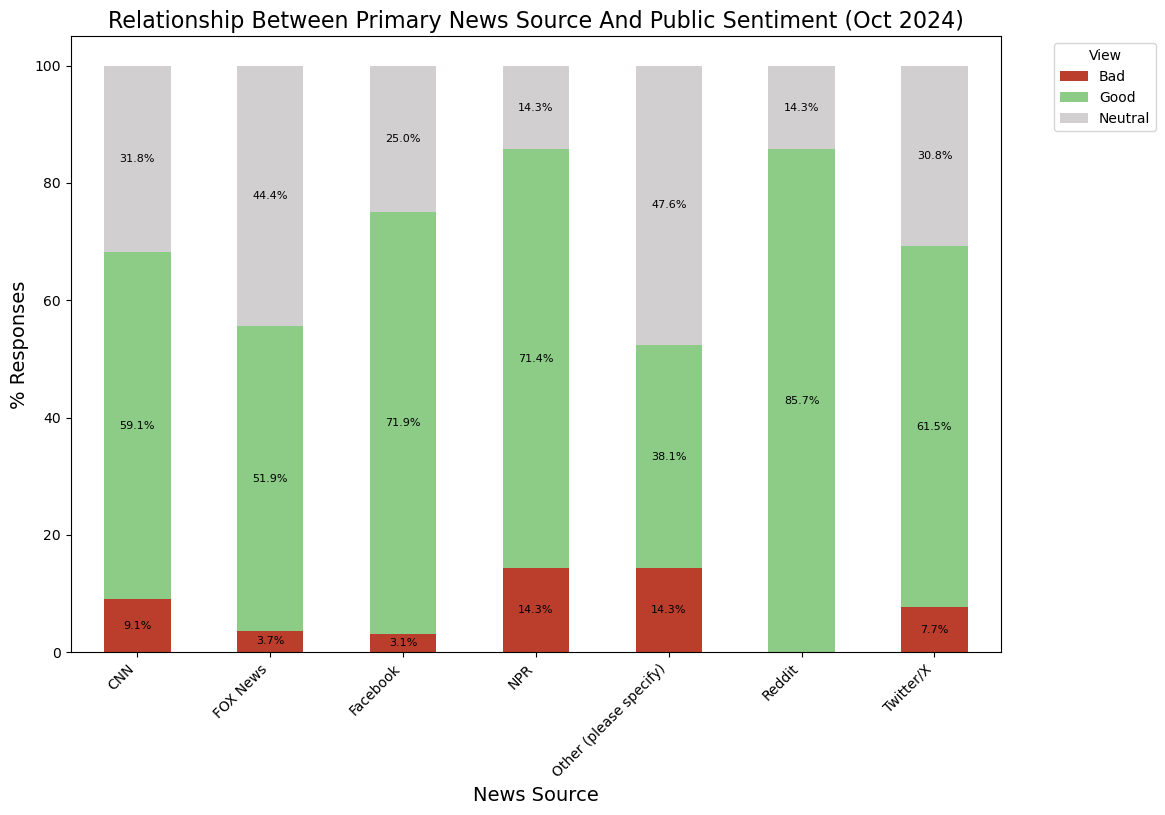

<Figure size 7200x4000 with 0 Axes>

In [109]:
plot_stacked_bar_chart(
    df=oct24, 
    title='Relationship Between Primary News Source And Public Sentiment (Oct 2024)',
    xlabel='News Source',
    ylabel='% Responses',
    cat_col= 'Where do you get your news from?',
    sent_col='How do you feel about Muslim people in America?'
)

In [110]:
oct24[oct24['Where do you get your news from?']== 'Other (please specify)']['News_other']

5                         local tv and talk radio
22                                   Social media
24                           a variety of sources
28                                     Local news
30                                          other
31                                         KTLA 5
39                 Google/Various Newspaper Sites
55                                             tv
61                               ABC, nbc, apnews
62                          cnn and local channel
73                                   Google pages
75                                            The
87     I do my own research about current events.
97                                         Google
101                                           NaN
102                                   Local  c w 
105                                           ABC
113                                      Research
115                      our work feed and google
118                                           ABC


## Observation 8


Reddit and Facebook users predominantly hold positive views, suggesting these platforms might foster more favorable attitudes or simply attract users with those views.

NPR and CNN audiences show a notable share of negative views, yet NPR still has a substantial portion of positive views, indicating mixed sentiment.

Fox News viewers mainly report neutral views, which contrasts with CNN's higher mix of positive and neutral responses.

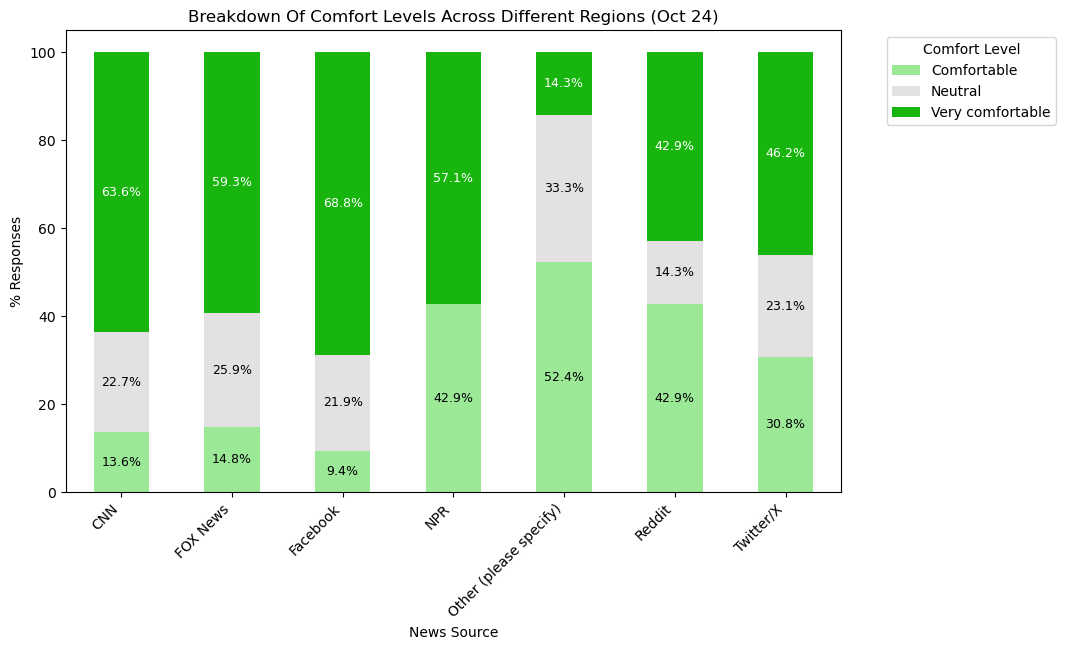

In [111]:
plot_comfort(
    df= oct24, 
    category_col= 'Where do you get your news from?',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Different Regions (Oct 24)',
    xlabel='News Source',
    ylabel='% Responses',
)

# 7. Relationship between Gender and Sentiment

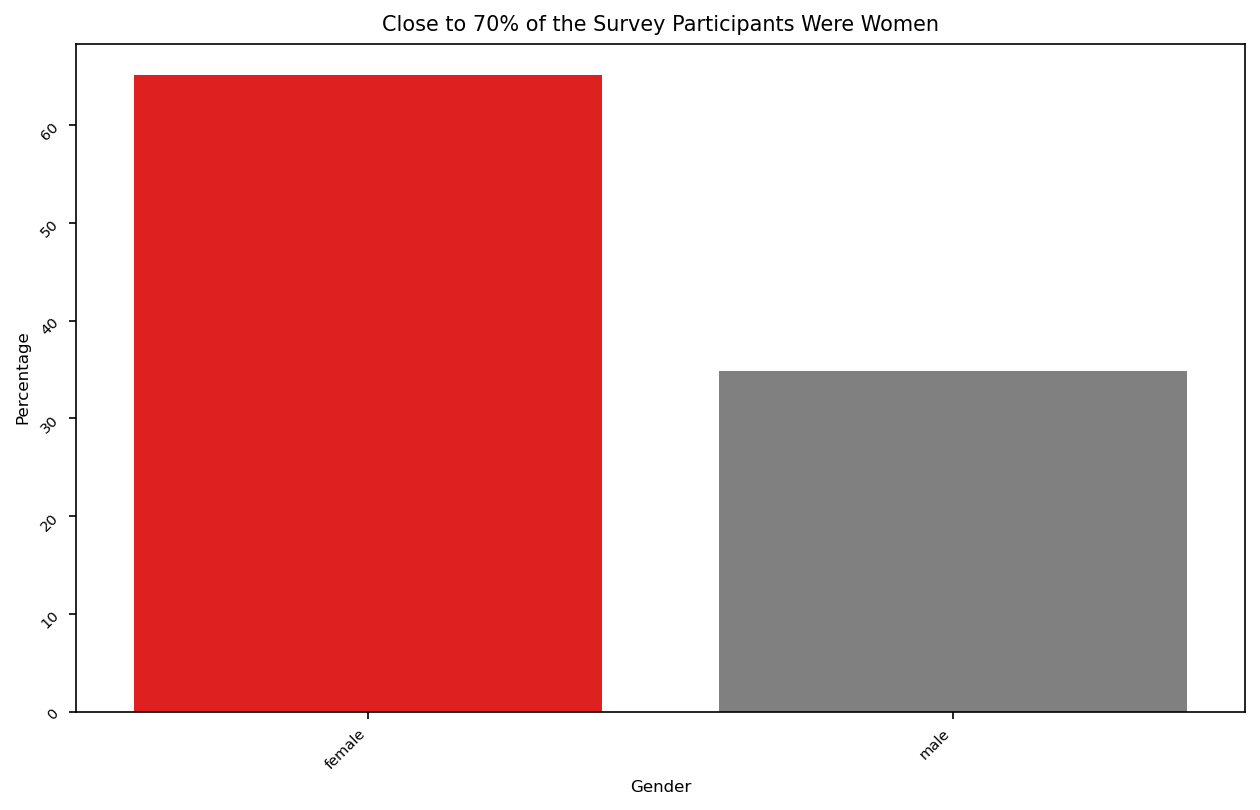

In [112]:
plot_percentages(oct24,'Gender', 'Gender',
           'Close to 70% of the Survey Participants Were Women')

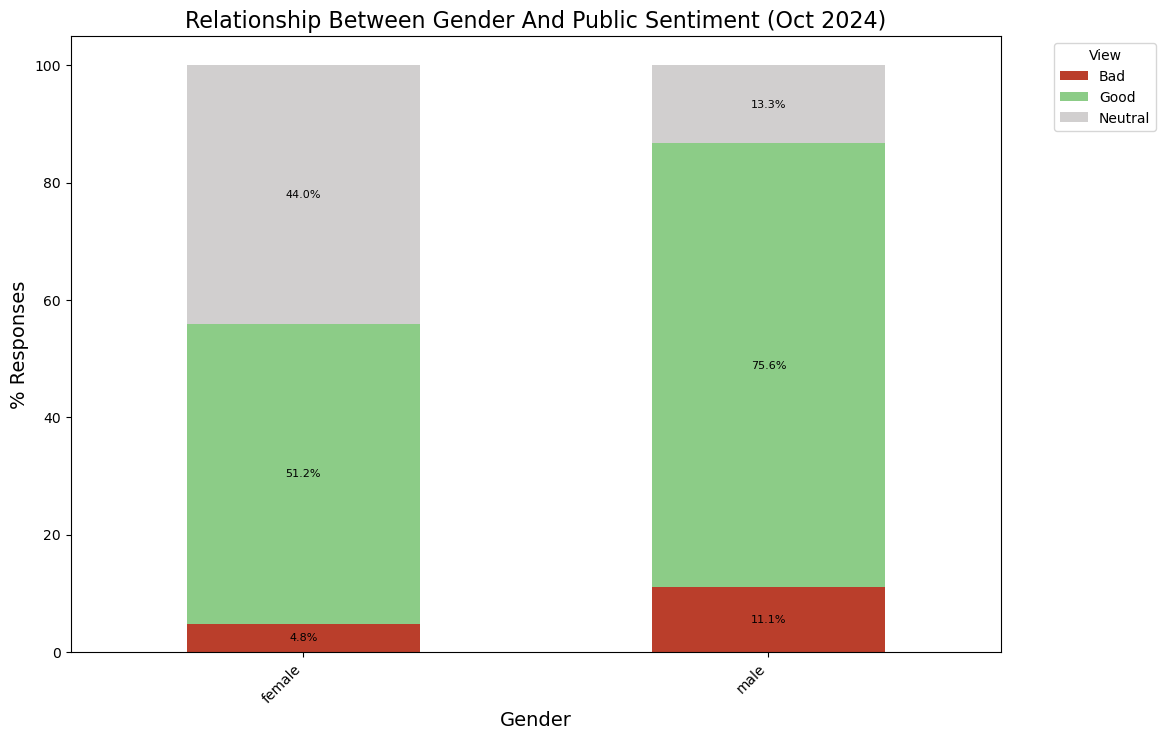

<Figure size 7200x4000 with 0 Axes>

In [113]:
plot_stacked_bar_chart(
    df=oct24, 
    title='Relationship Between Gender And Public Sentiment (Oct 2024)',
    xlabel='Gender',
    ylabel='% Responses',
    cat_col= 'Gender',
    sent_col='How do you feel about Muslim people in America?'
)

## Observation 9

The data suggests that men are more likely to hold positive views of Muslims, with 75.6% of male respondents indicating a 'Good' perception, compared to 51.1% of female respondents. Women, however, are more likely to remain neutral, with 44% expressing a 'Neutral' view. Negative sentiment remains low among both genders, with higher proportions among men

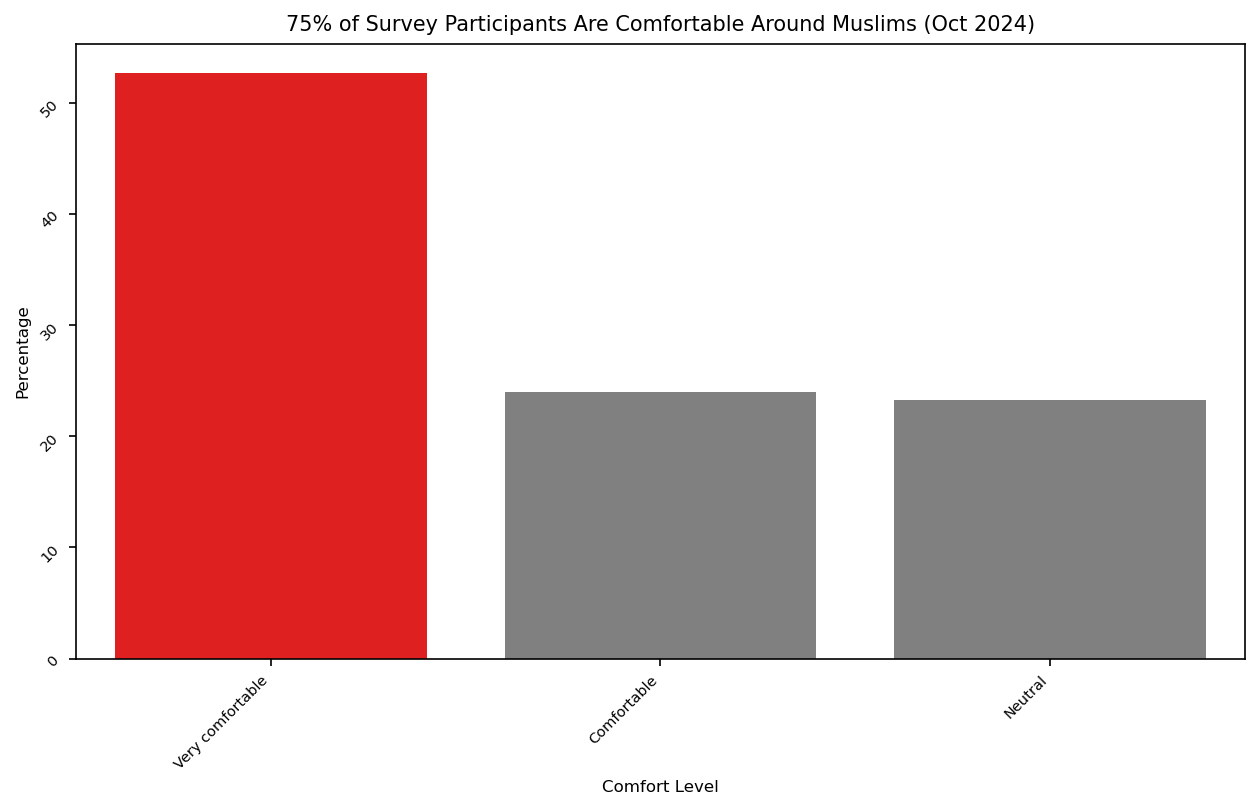

In [114]:
plot_percentages(oct24, 'How comfortable do you feel interacting with Muslims in your community?', \
                 'Comfort Level', '75% of Survey Participants Are Comfortable Around Muslims (Oct 2024)')

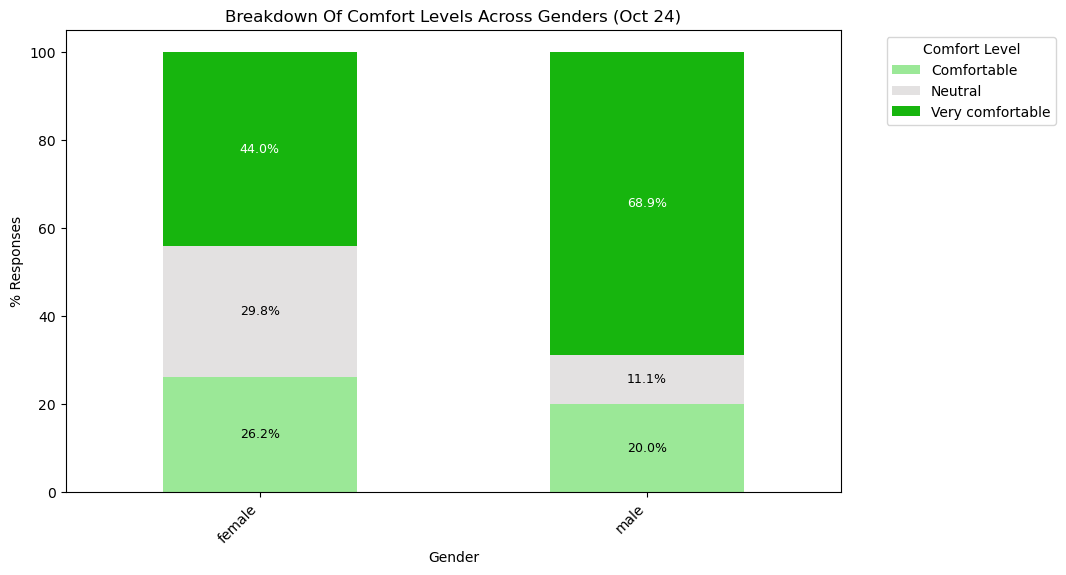

In [124]:
plot_comfort(
    df= oct24, 
    category_col= 'Gender',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Genders (Oct 24)',
    xlabel='Gender',
    ylabel='% Responses',
)

## Observation 11

All religious groups, except Hindus, express a favorable attitude towards Muslims. Hindus do not express any levels of discomfort but are neutral towards Muslims

In [116]:
oct24[oct24['What is your religion?']=='Other (please specify)'][['Religion_other','How comfortable do you feel interacting with Muslims in your community?']]

,Religion_other,How comfortable do you feel interacting with Muslims in your community?
6,catholic,Very comfortable
17,catholic,Comfortable
32,Catholic,Very comfortable
55,Catholic,Very comfortable
75,The,Neutral
87,Pastafarian,Comfortable
94,Catholic,Neutral
107,catholic,Very comfortable


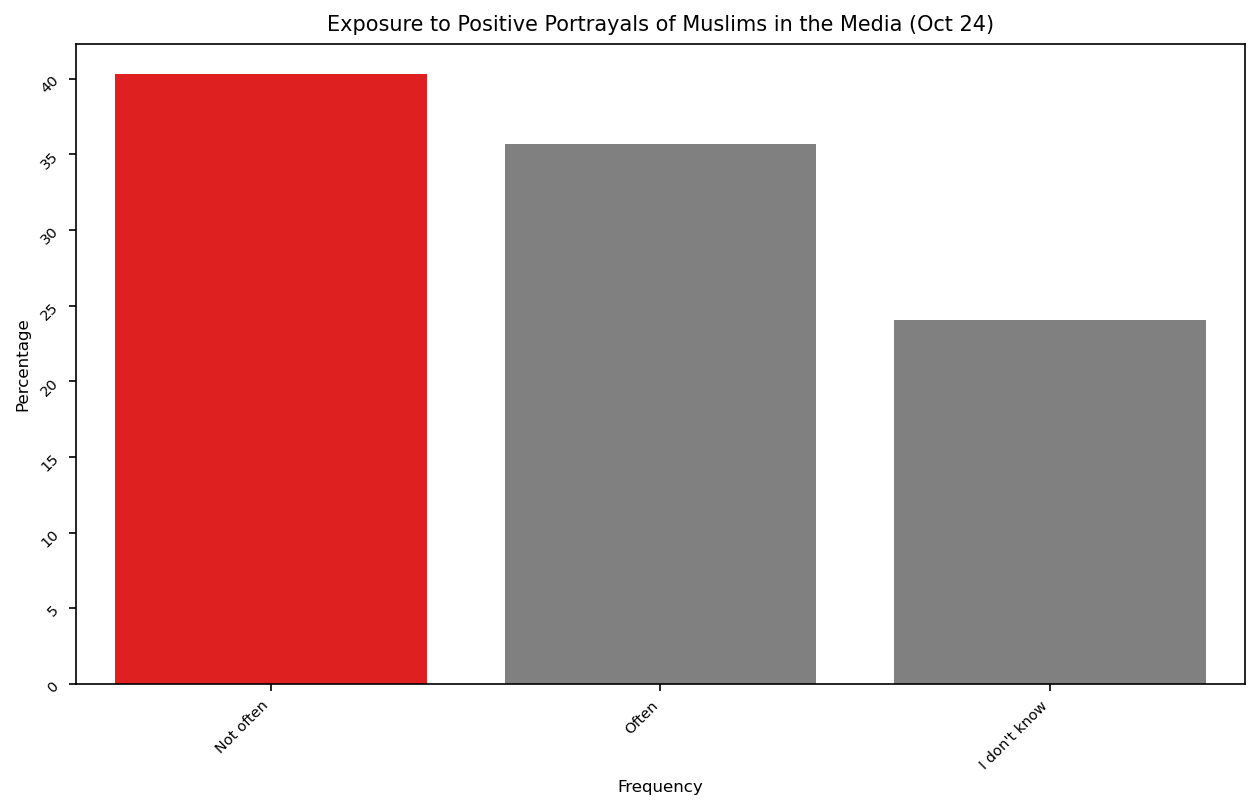

In [130]:
plot_percentages(oct24, 'How often do you hear positive things about Muslims in the media?', 'Frequency',\
                  'Exposure to Positive Portrayals of Muslims in the Media (Oct 24)' )

## Observation 12

The largest portion of respondents falls into the "Not often" category, indicating that a significant number of participants rarely see positive portrayals of Muslims in the media. This limited exposure could impact general attitudes or comfort levels around Muslims

A sizable number of participants report seeing positive portrayals "Often," suggesting that some segments of the population have consistent exposure to favorable representations. 

A notable portion of respondents selected "I don't know," which could indicate either a lack of awareness about media portrayals or indifference to media content. This group might lack the context to form strong positive or negative perceptions, which could contribute to a more neutral stance.

In [118]:
def plot_exposure(df, category_col, exposure_level, title, xlabel, ylabel):   
    grouped = df.groupby([category_col, exposure_level]).size().reset_index(name='count')
    totals = grouped.groupby(category_col)['count'].transform('sum')
    grouped['percentage'] = (grouped['count'] / totals) * 100

    pivot_table = grouped.pivot(index=category_col, columns=exposure_level, values='percentage').fillna(0)

    exposure_colors = {
        'Often': '#17b50e',            
        'Not Often': '#cf4229',     
        "I don't know": '#9db0f2' 
    }

    ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), 
                          color=[exposure_colors.get(level, '#cccccc') for level in pivot_table.columns])


    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Exposure Level', bbox_to_anchor=(1.05, 1), loc='upper left')

    for i, category in enumerate(pivot_table.index):
        cumulative_percentage = 0
        for level in pivot_table.columns:
            percentage = pivot_table.loc[category, level]
            if percentage > 0:
                ax.text(
                    i, cumulative_percentage + (percentage / 2),  # Position in the middle of each segment
                    f"{percentage:.1f}%", 
                    ha='center', va='center', color='white' if level == 'Often' else 'black', fontsize=9
                )
                cumulative_percentage += percentage
    plt.figure(figsize=(9, 5), dpi=400)
    plt.show()

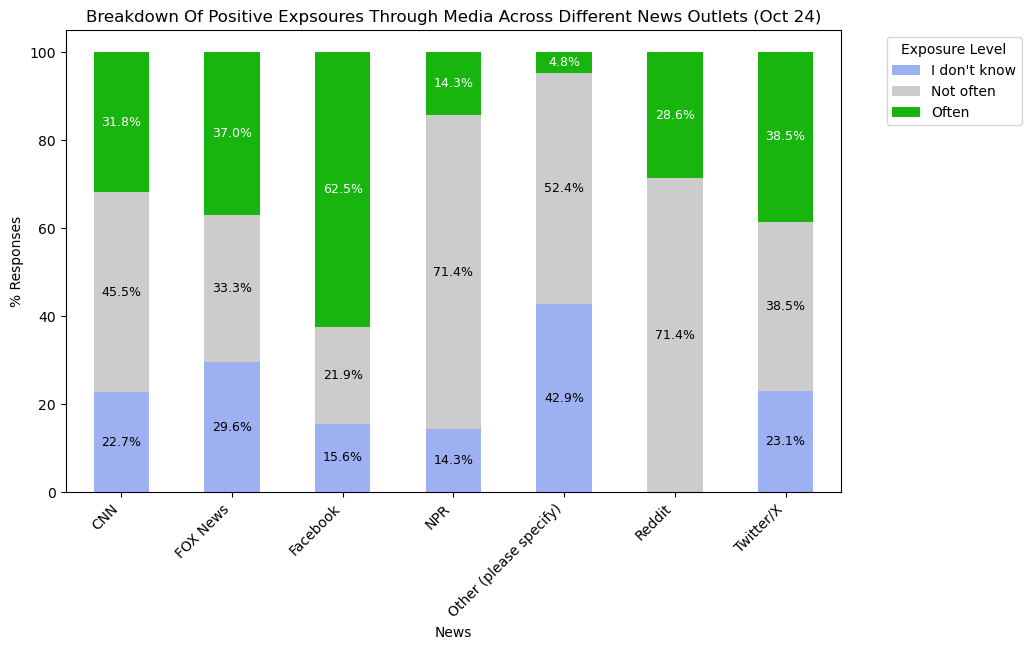

<Figure size 3600x2000 with 0 Axes>

In [120]:
plot_exposure(
    df= oct24, 
    category_col= 'Where do you get your news from?',
    exposure_level = 'How often do you hear positive things about Muslims in the media?',
    title='Breakdown Of Positive Expsoures Through Media Across Different News Outlets (Oct 24)',
    xlabel='News',
    ylabel='% Responses',
)

**Correlate with Comfort Levels:** Do those who report frequent exposure to positive portrayals have higher comfort levels with Muslims compared to those who report seeing positive portrayals less frequently?

This data suggests that coming across Muslim-led events ``(In the last 30 days, have you come across any events or activities sponsored by a Muslim person or organization?'``, is associated with a significantly higher likelihood of positive perceptions. The engagement and exposure in these settings may help reduce uncertainty and promote positive associations. For those without such experiences, neutrality may stem from limited exposure or understanding.

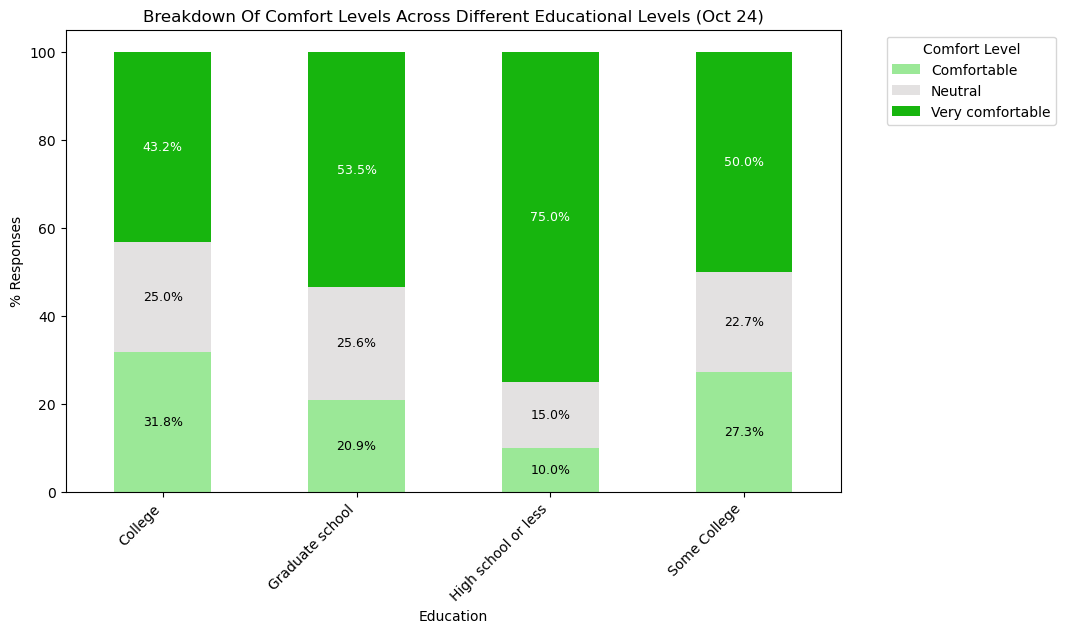

In [122]:
plot_comfort(
    df= oct24, 
    category_col= 'What is your level of education?',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Different Educational Levels (Oct 24)',
    xlabel='Education',
    ylabel='% Responses',
)

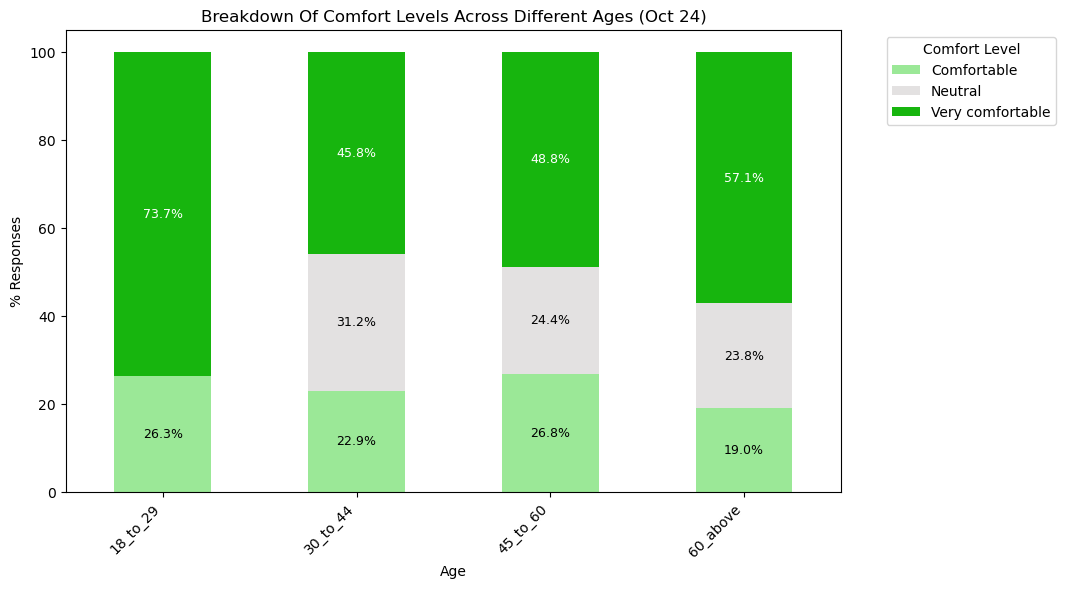

In [123]:
plot_comfort(
    df= oct24, 
    category_col= 'Age',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Different Ages (Oct 24)',
    xlabel='Age',
    ylabel='% Responses',
)

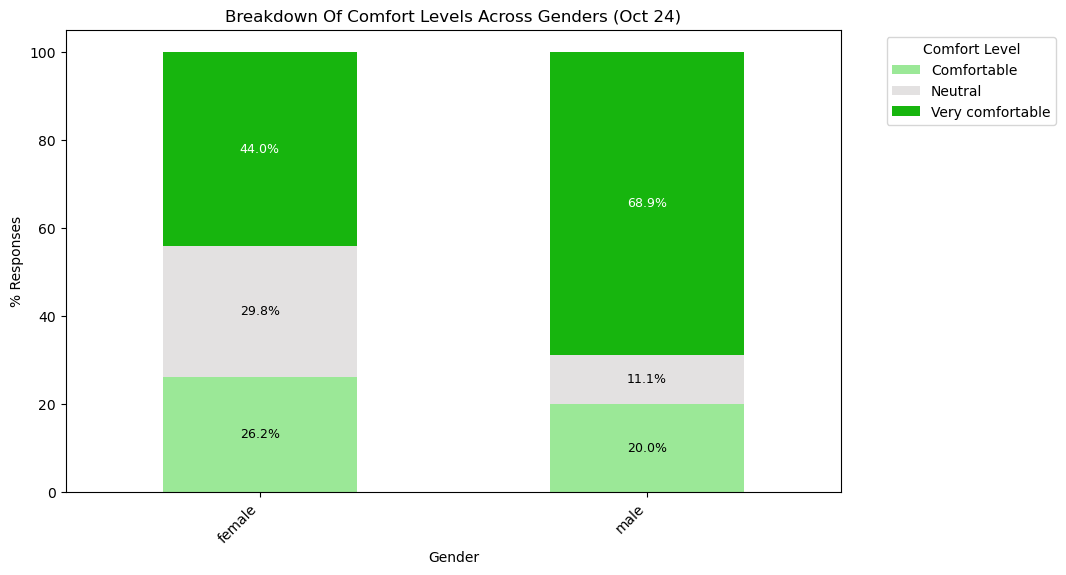

In [125]:
plot_comfort(
    df= oct24, 
    category_col= 'Gender',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Genders (Oct 24)',
    xlabel='Gender',
    ylabel='% Responses',
)

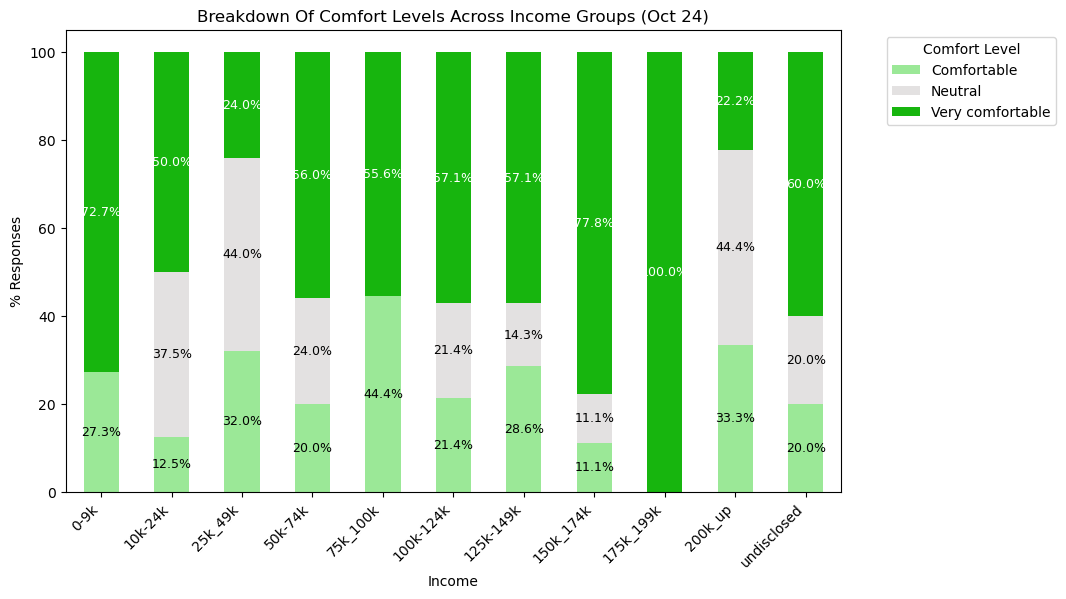

In [126]:
plot_comfort(
    df= oct24, 
    category_col= 'Household Income',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Income Groups (Oct 24)',
    xlabel='Income',
    ylabel='% Responses',
)

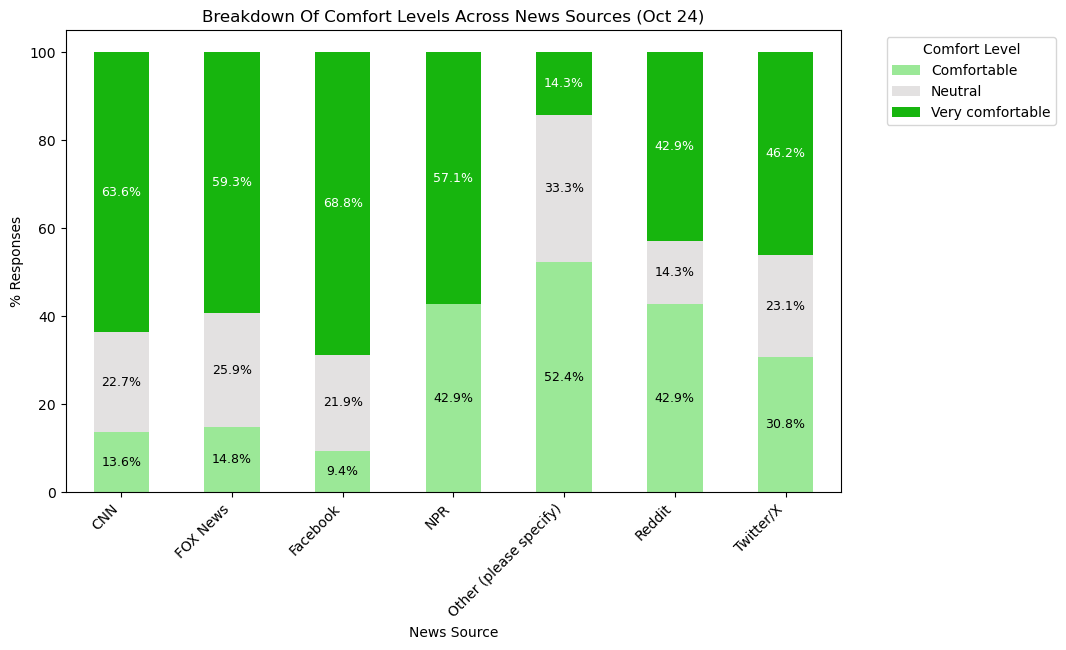

In [129]:
plot_comfort(
    df= oct24, 
    category_col= 'Where do you get your news from?',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across News Sources (Oct 24)',
    xlabel='News Source',
    ylabel='% Responses',
)